# Data Import

In [1]:
backup_dir = 'gas-sensor-array-temperature-modulation'
backup_file_1 = '20160930_203718.csv'
backup_path_1 = backup_dir + '/' + backup_file_1

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.metrics as sm
from sklearn.linear_model import LinearRegression, LogisticRegression
import sklearn.model_selection as sms
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.feature_selection import f_regression, mutual_info_regression

from sklearn.model_selection import TimeSeriesSplit

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPRegressor

from sklearn.svm import LinearSVR, LinearSVC
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import IsolationForest


# calculate heuristic class weighting
from sklearn.utils.class_weight import compute_class_weight
import joblib
import statsmodels.api as sm


from statsmodels.tsa.statespace.structural import UnobservedComponents


%matplotlib inline

In [3]:
def import_data(data_source, cothl_names=None):
    return pd.read_csv(data_source, names=cothl_names)

In [4]:
#read the file of first measurement (performed at 2016-09-30) as a data frame:
df20160930 = import_data(backup_path_1)
col_names = df20160930.columns.values

# Merged Dataset Analysis

In [3]:
def merge_datasets(filenames, cothlumns = None):
  file0 = filenames.pop(0)
  dfs = []
  merged_df = import_data(file0)
  dfs.append(merged_df)
  # print(file0)
  for file in filenames:
    print(file)
    curr_df = import_data(file)
    curr_df.info()
    # merged_df.cothncat(curr_df)
    dfs.append(curr_df)
  merged_dfs = pd.cothncat(dfs, axis = 0)
  return merged_dfs

In [8]:
merged_df = merge_datasets([backup_dir + "/20160930_203718.csv",
                                  backup_dir + "/20161001_231809.csv",
                                  backup_dir + "/20161003_085624.csv",
                                  backup_dir + "/20161004_104124.csv",
                                  backup_dir + "/20161005_140846.csv",
                                  backup_dir + "/20161006_182224.csv",
                                  backup_dir + "/20161007_210049.csv",
                                  backup_dir + "/20161008_234508.csv",
                                  backup_dir + "/20161010_095046.csv",
                                  backup_dir + "/20161011_113032.csv",
                                  backup_dir + "/20161013_143355.csv",
                                  backup_dir + "/20161014_184659.csv",
                                  backup_dir + "/20161016_053656.csv"])

gas-sensor-array-temperature-modulation/20161001_231809.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295516 entries, 0 to 295515
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Time (s)            295516 non-null  float64
 1   CO (ppm)            295516 non-null  float64
 2   Humidity (%r.h.)    295516 non-null  float64
 3   Temperature (C)     295516 non-null  float64
 4   Flow rate (mL/min)  295516 non-null  float64
 5   Heater voltage (V)  295516 non-null  float64
 6   R1 (MOhm)           295516 non-null  float64
 7   R2 (MOhm)           295516 non-null  float64
 8   R3 (MOhm)           295516 non-null  float64
 9   R4 (MOhm)           295516 non-null  float64
 10  R5 (MOhm)           295516 non-null  float64
 11  R6 (MOhm)           295516 non-null  float64
 12  R7 (MOhm)           295516 non-null  float64
 13  R8 (MOhm)           295516 non-null  float64
 14  R9 (MOhm)           2955

In [33]:
merged_df = merged_df.reset_index(drop=True)

In [9]:
merged_df.to_csv(backup_dir + "/merged_data.csv")

Text(0.5, 1.0, 'Time vs CO')

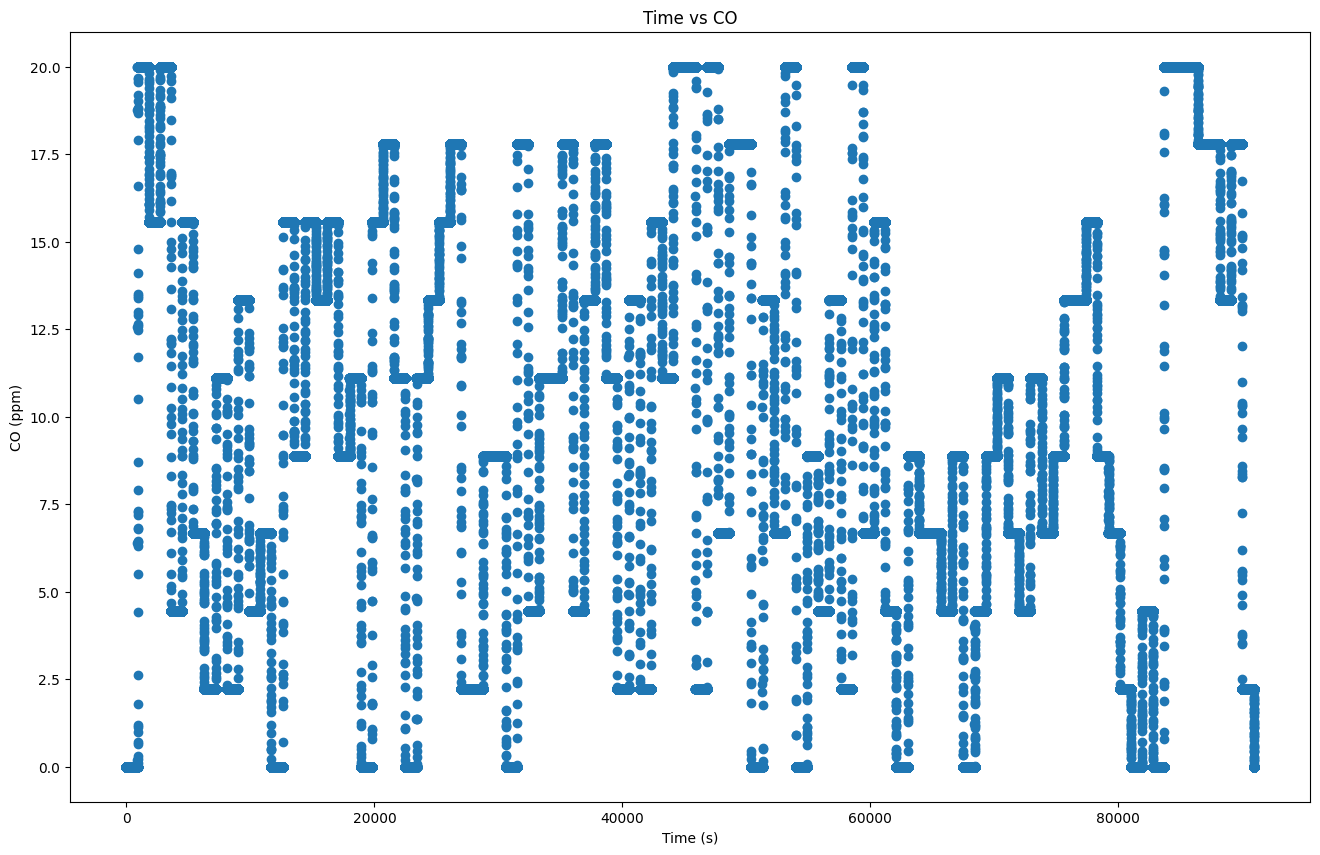

In [156]:
plt.figure(figsize=(16,10)) 
plt.scatter(merged_df["Time (s)"],merged_df["CO (ppm)"])
plt.xlabel("Time (s)")
plt.ylabel("CO (ppm)")
plt.title("Time vs CO")

Text(0.5, 1.0, 'Time vs Humidity')

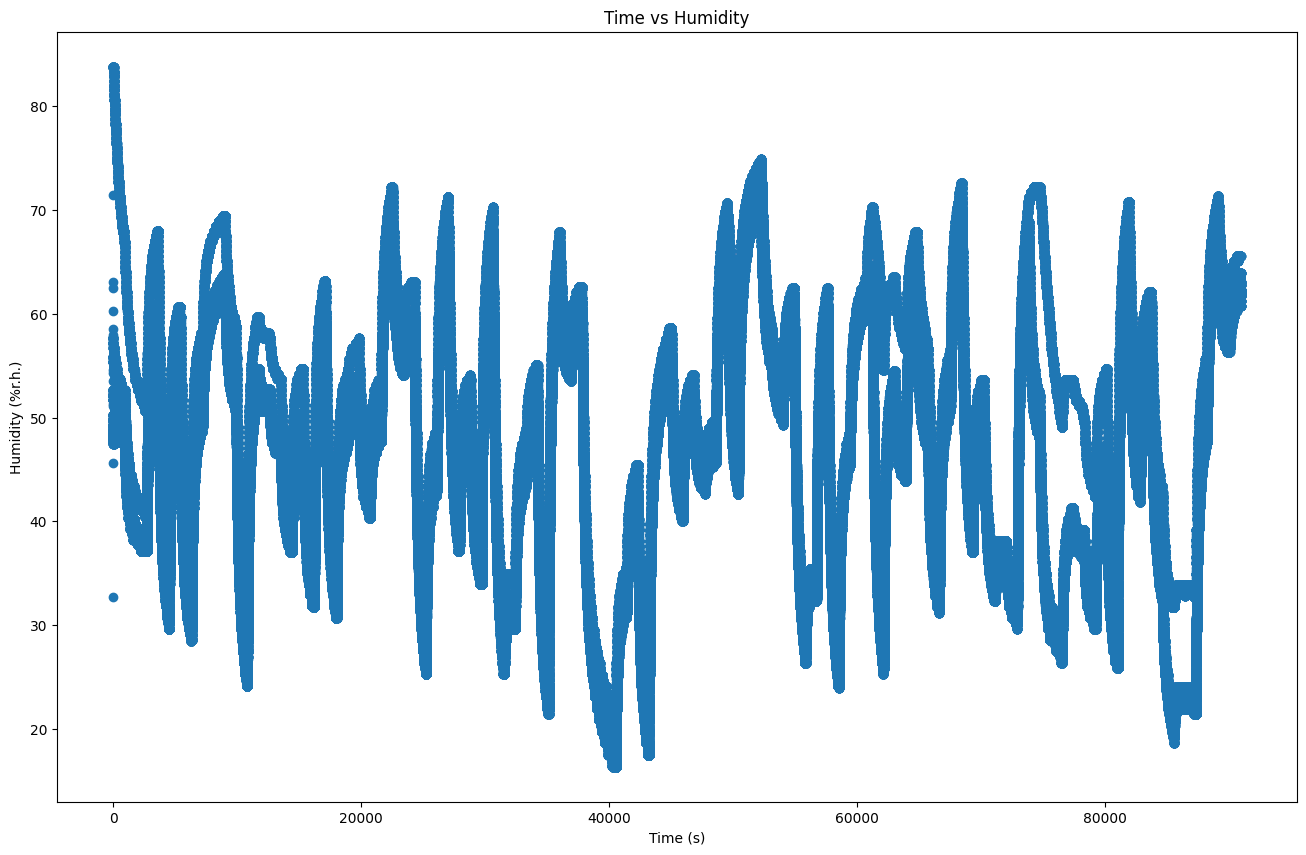

In [157]:
plt.figure(figsize=(16,10)) 
plt.scatter(merged_df["Time (s)"],merged_df["Humidity (%r.h.)"])
plt.xlabel("Time (s)")
plt.ylabel("Humidity (%r.h.)")
plt.title("Time vs Humidity")

In [136]:
pd.unique(df20160930['coth (ppm)'])

array([ 0.    ,  0.64  ,  6.82  , 13.    , 19.2   , 20.    , 19.6048,
       18.2506, 16.8964, 15.56  , 16.1239, 17.4914, 18.8634, 19.7355,
       14.9897, 10.2439,  5.4981,  4.44  ,  5.4853,  8.8769, 12.2796,
       12.8752, 10.1193,  7.3723,  6.67  ,  6.314 ,  4.9567,  3.6039,
        2.2467,  2.22  ,  4.8514,  7.6073, 10.3544, 11.11  , 11.0567,
        8.3096,  5.5715,  2.8156,  4.742 ,  8.175 , 11.608 , 13.33  ,
       11.4275,  8.6894,  5.9513,  5.0845,  5.7646,  6.4448,  5.8162,
        3.7619,  1.6942,  4.0923,  8.9003, 13.7084, 15.0798, 13.0254,
       10.9644,  8.89  ,  9.6771, 11.7314, 13.7858, 15.415 , 14.7371,
       14.057 , 13.3746, 13.7247, 14.4116, 15.1006, 14.8863, 12.8586,
       10.8243,  9.0609,  9.738 , 10.4129, 11.09  , 10.4212,  6.9771,
        3.533 ,  0.0889,  4.7302,  9.476 , 14.2063, 15.9374, 16.6256,
       17.3116, 17.78  , 15.819 , 13.7713, 11.7036, 10.6878,  7.2993,
        3.9218,  0.5333,  1.3554,  4.7329,  8.1214, 11.5695, 12.2555,
       12.9415, 13.9

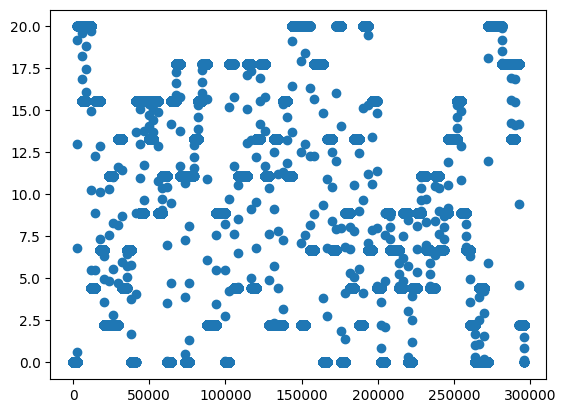

In [139]:
plt.scatter(range(len(df20160930['CO (ppm)'].values)),df20160930['CO (ppm)'])

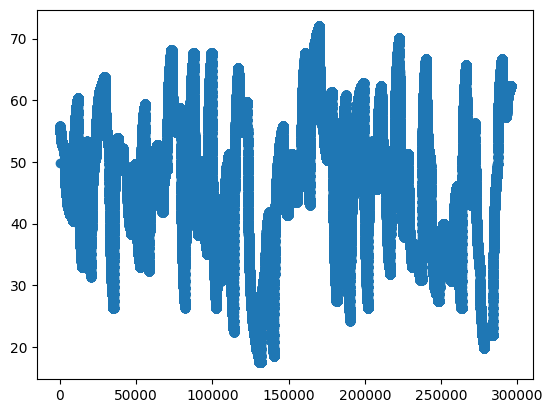

In [140]:
plt.scatter(range(len(df20160930['Humidity (%r.h.)'].values)),df20160930['Humidity (%r.h.)'])

# Brief EDA on all data

In [6]:
#show the head of the data frame:
df20160930.head(20)

Time (s)  CO (ppm)  Humidity (%r.h.)  Temperature (C)  Flow rate (mL/min)  \
0      0.000       0.0           49.7534          23.7184            233.2737   
1      0.309       0.0           55.8400          26.6200            241.6323   
2      0.618       0.0           55.8400          26.6200            241.3888   
3      0.926       0.0           55.8400          26.6200            241.1461   
4      1.234       0.0           55.8400          26.6200            240.9121   
5      1.544       0.0           55.8400          26.6200            240.8361   
6      1.854       0.0           55.8400          26.6200            240.7602   
7      2.163       0.0           55.8400          26.6200            240.6845   
8      2.472       0.0           55.8400          26.6200            240.6624   
9      2.781       0.0           55.8400          26.6200            240.6519   
10     3.090       0.0           55.8400          26.6200            240.6414   
11     3.397       0.0           55.8400          26.6200            240.6238   
12     3.707       0.0           55.8400          26.6200            240.6008   
13     4.015       0.0           55.8400          26.6200            240.5780   
14     4.324       0.0           55.8400          26.6200            240.5654   
15     4.635       0.0           55.8400          26.6200            240.5726   
16     4.944       0.0           55.8400          26.6200            240.5797   
17     5.254       0.0           55.8400          26.6200            240.5751   
18     5.562       0.0           55.8400          26.6200            240.4818   
19     5.871       0.0           55.8400          26.6200            240.3881   

    Heater voltage (V)  R1 (MOhm)  R2 (MOhm)  R3 (MOhm)  R4 (MOhm)  R5 (MOhm)  \
0               0.8993     0.2231     0.6365     1.1493     0.8483     1.2534   
1               0.2112     2.1314     5.3552     9.7569     6.3188     9.4472   
2               0.2070    10.5318    22.5612    37.2635    17.7848    33.0704   
3               0.2042    29.5749    49.5111    65.6318    26.1447    58.3847   
4               0.2030    49.5111    67.0368    77.8317    27.9625    71.7732   
5               0.2020    60.1083    74.3444    81.5100    29.7970    72.9643   
6               0.2010    64.1020    74.3444    76.4748    28.1797    72.4181   
7               0.2009    62.6869    71.3877    73.8965    27.6523    64.4007   
8               0.2009    54.8336    67.0368    69.2228    27.4429    64.9211   
9               0.2003    51.2600    64.5303    61.4312    25.6881    54.7235   
10              0.2000    44.4420    54.4606    58.1498    25.4084    53.6815   
11              0.2000    41.4592    50.3972    52.5235    24.4668    51.7661   
12              0.2002    37.1649    48.7046    49.2128    21.9832    47.5412   
13              0.2000    33.3963    41.8611    48.6589    23.4223    47.2584   
14              0.2000    31.3207    37.6686    40.2600    23.2018    43.2625   
15              0.2000    28.0928    32.3820    43.0884    22.1194    43.9021   
16              0.2000    25.0092    26.7632    41.4265    22.6808    42.4121   
17              0.2000    22.0276    21.3459    36.9410    21.9218    41.1962   
18              0.2000    18.3814    16.2418    34.5448    22.0573    41.5938   
19              0.2000    15.1623    12.1369    29.0829    21.4542    40.0465   

    R6 (MOhm)  R7 (MOhm)  R8 (MOhm)  R9 (MOhm)  R10 (MOhm)  R11 (MOhm)  \
0      1.4449     1.9906     1.3303     1.4480      1.9148      3.4651   
1     10.5769    13.6317    21.9829    16.1902     24.2780     31.1014   
2     36.3160    42.5746    49.7495    31.7533     57.7289     53.6275   
3     67.5130    68.0064    59.2824    36.7821     66.0832     66.8349   
4     79.9474    79.8631    62.5385    39.6271     68.1441     62.0947   
5     83.1477    80.5302    58.0412    39.2482     65.0981     67.8697   
6     78.4368    79.0768    59.7614    40.4067     64.1416     61.6173   
7     69

In [12]:
#make a correlated data frame:
#finding pairwise correlation of all columns in the dataframe.
#Any na values are automatically excluded. For any non-numeric data type columns
#in the dataframe it is ignored.
df20160930_corr=df20160930.corr()


In [13]:
#show the details of the data frame
#(number and list of the cothlumns names,data type of eaccocolumn,...)
df20160930.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295719 entries, 0 to 295718
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Time (s)            295719 non-null  float64
 1   CO (ppm)            295719 non-null  float64
 2   Humidity (%r.h.)    295719 non-null  float64
 3   Temperature (C)     295719 non-null  float64
 4   Flow rate (mL/min)  295719 non-null  float64
 5   Heater voltage (V)  295719 non-null  float64
 6   R1 (MOhm)           295719 non-null  float64
 7   R2 (MOhm)           295719 non-null  float64
 8   R3 (MOhm)           295719 non-null  float64
 9   R4 (MOhm)           295719 non-null  float64
 10  R5 (MOhm)           295719 non-null  float64
 11  R6 (MOhm)           295719 non-null  float64
 12  R7 (MOhm)           295719 non-null  float64
 13  R8 (MOhm)           295719 non-null  float64
 14  R9 (MOhm)           295719 non-null  float64
 15  R10 (MOhm)          295719 non-nul

In [ ]:
#show the shortened form of the full data frame (the first and last few rows are displayed)
df20160930

Time (s)  CO (ppm)  Humidity (%r.h.)  Temperature (C)  \
0           0.000       0.0           49.7534          23.7184   
1           0.309       0.0           55.8400          26.6200   
2           0.618       0.0           55.8400          26.6200   
3           0.926       0.0           55.8400          26.6200   
4           1.234       0.0           55.8400          26.6200   
...           ...       ...               ...              ...   
295714  90908.545       0.0           62.3000          26.5800   
295715  90908.853       0.0           62.3000          26.5800   
295716  90909.162       0.0           62.3000          26.5800   
295717  90909.469       0.0           62.3000          26.5800   
295718  90909.778       0.0           62.3000          26.5800   

        Flow rate (mL/min)  Heater voltage (V)  R1 (MOhm)  R2 (MOhm)  \
0                 233.2737              0.8993     0.2231     0.6365   
1                 241.6323              0.2112     2.1314     5.3552   
2                 241.3888              0.2070    10.5318    22.5612   
3                 241.1461              0.2042    29.5749    49.5111   
4                 240.9121              0.2030    49.5111    67.0368   
...                    ...                 ...        ...        ...   
295714              0.0000              0.2000     5.5429     2.5713   
295715              0.0000              0.2000     4.5527     2.1454   
295716              0.0000              0.2000     3.7374     1.8492   
295717              0.0000              0.2000     3.1197     1.6190   
295718              0.0000              0.2000     2.6417     1.4409   

        R3 (MOhm)  R4 (MOhm)  R5 (MOhm)  R6 (MOhm)  R7 (MOhm)  R8 (MOhm)  \
0          1.1493     0.8483     1.2534     1.4449     1.9906     1.3303   
1          9.7569     6.3188     9.4472    10.5769    13.6317    21.9829   
2         37.2635    17.7848    33.0704    36.3160    42.5746    49.7495   
3         65.6318    26.1447    58.3847    67.5130    68.0064    59.2824   
4         77.8317    27.9625    71.7732    79.9474    79.8631    62.5385   
...           ...        ...        ...        ...        ...        ...   
295714    10.3815    18.5796    36.4589    34.4549    38.3745    57.5888   
295715     8.5494    18.0592    36.6290    34.0052    37.6964    51.9752   
295716     7.1062    18.0087    36.0127    32.5056    37.1882    54.4724   
295717     5.9138    17.6950    37.5930    30.5253    35.9328    51.9752   
295718     4.9396    17.0448    35.1252    29.4024    35.2025    58.0412   

        R9 (MOhm)  R10 (MOhm)  R11 (MOhm)  R12 (MOhm)  R13 (MOhm)  R14 (MOhm)  
0          1.4480      1.9148      3.4651      5.2144      6.5806      8.6385  
1         16.1902     24.2780     31.1014     34.7193     31.7505     41.9167  
2         31.7533     57.7289     53.6275     56.9212     47.8255     62.9436  
3         36.7821     66.0832     66.8349     66.9695     50.3730     64.8363  
4         39.6271     68.1441     62.0947     49.4614     52.8453     66.8445  
...           ...         ...         ...         ...         ...         ...  
295714    45.7953     56.6351     56.4058     50.6129     43.0232     65.2822  
295715    45.0239     58.9374     61.6173     50.9361     43.4604     63.8761  
295716    45.0239     59.7462     57.1452     51.8182     42.5944     64.3090  
295717    45.5201     57.7289     60.3791     50.3466     42.4022     62.0375  
295718    43.1405     58.1498     56.0760     51.5393     41.9854     47.5339  

[295719 rows x 20 columns]

In [ ]:
#show the list of total null values in each cothlumn:
df20160930.isnull().sum()

Time (s)              0
CO (ppm)              0
Humidity (%r.h.)      0
Temperature (C)       0
Flow rate (mL/min)    0
Heater voltage (V)    0
R1 (MOhm)             0
R2 (MOhm)             0
R3 (MOhm)             0
R4 (MOhm)             0
R5 (MOhm)             0
R6 (MOhm)             0
R7 (MOhm)             0
R8 (MOhm)             0
R9 (MOhm)             0
R10 (MOhm)            0
R11 (MOhm)            0
R12 (MOhm)            0
R13 (MOhm)            0
R14 (MOhm)            0
dtype: int64

# Data Splitting

In [5]:
#define object and featues in the data frame:
df = df20160930
x1 = df.drop('CO (ppm)',axis=1).drop('Humidity (%r.h.)', axis = 1)
y = df[['CO (ppm)', 'Humidity (%r.h.)']]


# Split data sets evenly into training, test, and deployment (40%, 30%, 30%)
x1_train, x1_deployment_test, y_train, y_deployment_test = train_test_split(x1, y, test_size=0.6, random_state=42, shuffle = False)
x1_test, x1_deployment, y_test, y_deployment = train_test_split(x1_deployment_test, y_deployment_test, test_size = 0.5, shuffle =  False)

In [37]:
x1_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118287 entries, 0 to 118286
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Time (s)            118287 non-null  float64
 1   Temperature (C)     118287 non-null  float64
 2   Flow rate (mL/min)  118287 non-null  float64
 3   Heater voltage (V)  118287 non-null  float64
 4   R1 (MOhm)           118287 non-null  float64
 5   R2 (MOhm)           118287 non-null  float64
 6   R3 (MOhm)           118287 non-null  float64
 7   R4 (MOhm)           118287 non-null  float64
 8   R5 (MOhm)           118287 non-null  float64
 9   R6 (MOhm)           118287 non-null  float64
 10  R7 (MOhm)           118287 non-null  float64
 11  R8 (MOhm)           118287 non-null  float64
 12  R9 (MOhm)           118287 non-null  float64
 13  R10 (MOhm)          118287 non-null  float64
 14  R11 (MOhm)          118287 non-null  float64
 15  R12 (MOhm)          118287 non-null  fl

In [38]:
x1_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88716 entries, 118287 to 207002
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time (s)            88716 non-null  float64
 1   Temperature (C)     88716 non-null  float64
 2   Flow rate (mL/min)  88716 non-null  float64
 3   Heater voltage (V)  88716 non-null  float64
 4   R1 (MOhm)           88716 non-null  float64
 5   R2 (MOhm)           88716 non-null  float64
 6   R3 (MOhm)           88716 non-null  float64
 7   R4 (MOhm)           88716 non-null  float64
 8   R5 (MOhm)           88716 non-null  float64
 9   R6 (MOhm)           88716 non-null  float64
 10  R7 (MOhm)           88716 non-null  float64
 11  R8 (MOhm)           88716 non-null  float64
 12  R9 (MOhm)           88716 non-null  float64
 13  R10 (MOhm)          88716 non-null  float64
 14  R11 (MOhm)          88716 non-null  float64
 15  R12 (MOhm)          88716 non-null  float64
 16  R13

In [39]:
# cothmbine the dataframes
train_df = pd.cothncat([x1_train, y_train], axis = 1)
test_df = pd.cothncat([x1_test, y_test], axis = 1)

# Perform Initial Round of EDA 

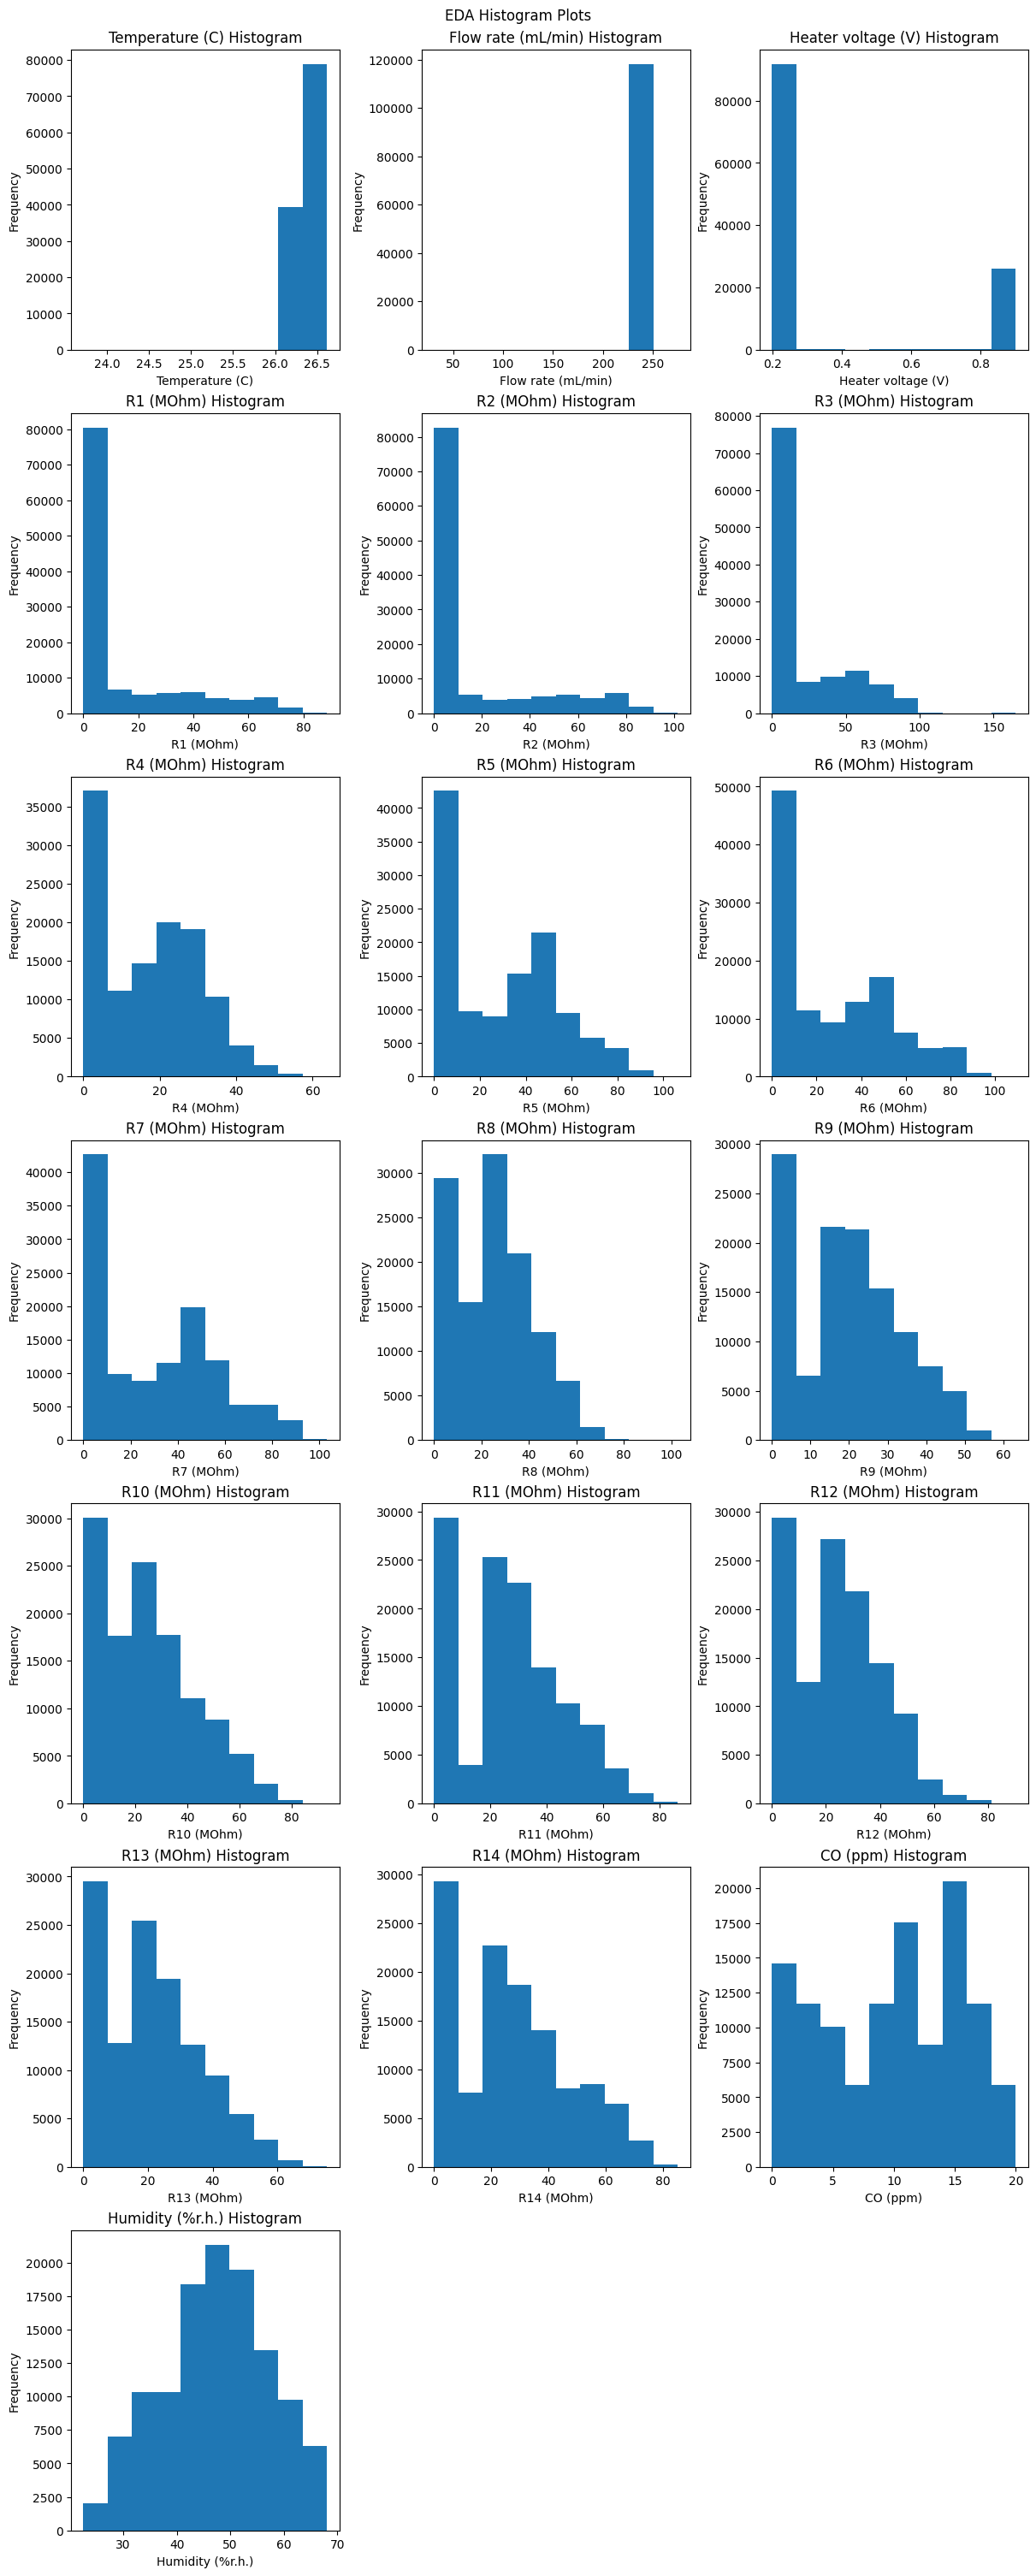

In [43]:
# Plot standard plots (all histograms + a time scatter plot)
fig = plt.figure(figsize = (12, 30), layout = "constrained")
fig.suptitle("EDA Histogram Plots")
num_cols = len(train_df.columns)
num_responses = len(y_train.columns)
for i in range(1, num_cols):
    ax1 = fig.add_subplot(num_cols//3 + 1, 3, i)
    ax1.hist(train_df.iloc[:,i])
    x_label_string = train_df.iloc[:,i].name
    if i < num_cols - num_responses:
        x_label_string = x_label_string
    else: 
        x_label_string = x_label_string
    ax1.set_xlabel(x_label_string)
    ax1.set_ylabel("Frequency")
    if i < num_cols - num_responses:
        ax1.title.set_text(train_df.iloc[:,i].name + " Histogram")
    else:
        ax1.title.set_text(train_df.iloc[:,i].name + " Histogram") 
plt.show()

In [44]:
import matplotlib
color_list = ["pink", "red", "maroon", "salmon", "orange", "yellow", "yellowgreen", "green", "cyan", "blue", "indigo", "violet", "gray", "black", "brown", "chocolate"]
colors = [matplotlib.colors.cnames[color] for color in color_list]

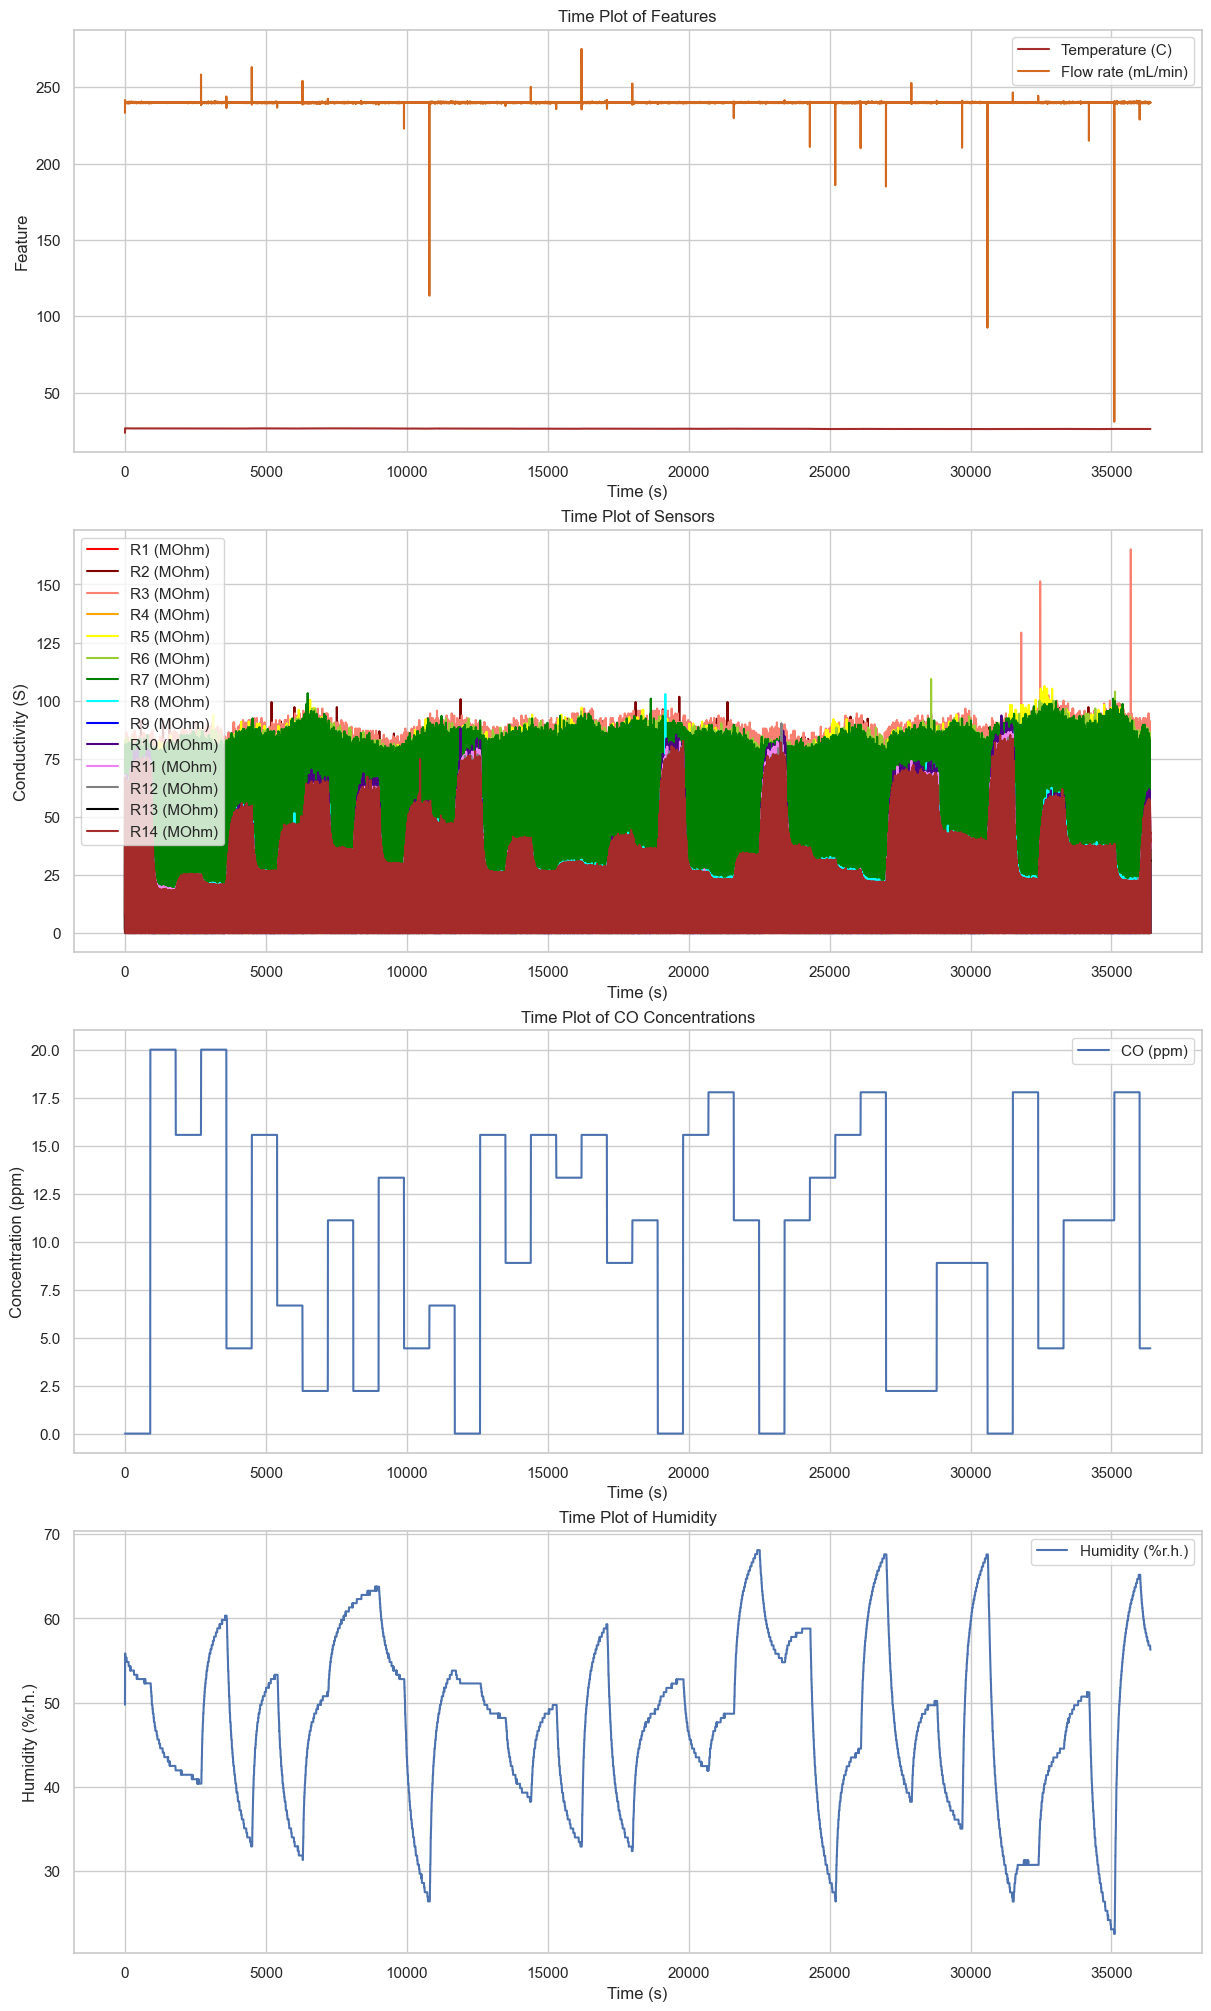

In [243]:
# Plot standard plots (all histograms + a time scatter plot) over training data
fig_conduct = plt.figure(figsize = (12, 20), layout = "constrained")
ax_scatter_other = fig_conduct.add_subplot(4, 1, 1)
ax_scatter_conduct = fig_conduct.add_subplot(4, 1, 2)
ax_scatter_concentration = fig_conduct.add_subplot(4, 1, 3)
ax_scatter_humidity = fig_conduct.add_subplot(4, 1, 4)
# Cycler for conductivity plots

for i in range(1, 20):
    x_label_string = train_df.iloc[:,i].name
    if i < 3 or i == 20:
        ax_scatter_other.plot(train_df.iloc[:,0], train_df.iloc[:,i], label = x_label_string, color = colors[i - 3])
        ax_scatter_other.legend()
        ax_scatter_other.set_xlabel("Time (s)")
        ax_scatter_other.set_ylabel("Feature")
        ax_scatter_other.title.set_text("Time Plot of Features") 
        ax_scatter_other.legend() 
    elif i > 3 and i < 18:
        ax_scatter_conduct.plot(train_df.iloc[:,0], train_df.iloc[:,i], label = x_label_string, color = colors[i - 3])
        ax_scatter_conduct.legend()
        ax_scatter_conduct.set_xlabel("Time (s)")
        ax_scatter_conduct.set_ylabel("Conductivity (S)")
        ax_scatter_conduct.title.set_text("Time Plot of Sensors") 
        ax_scatter_conduct.legend() 
    elif i == 18:  
        ax_scatter_concentration.plot(train_df.iloc[:,0], train_df.iloc[:,i], label = x_label_string)
        ax_scatter_concentration.legend()
        ax_scatter_concentration.set_xlabel("Time (s)")
        ax_scatter_concentration.set_ylabel("Concentration (ppm)")
        ax_scatter_concentration.title.set_text("Time Plot of CO Concentrations")
        ax_scatter_concentration.legend()  
    elif i == 19:
        ax_scatter_humidity.plot(train_df.iloc[:,0], train_df.iloc[:,i], label = x_label_string)
        ax_scatter_humidity.legend()
        ax_scatter_humidity.set_xlabel("Time (s)")
        ax_scatter_humidity.set_ylabel("Humidity (%r.h.)")
        ax_scatter_humidity.title.set_text("Time Plot of Humidity")
        ax_scatter_humidity.legend()  
plt.show()

# Set appropriate X values (get rid of time)

In [37]:
x1_train_no_time = x1_train.drop("Time (s)", axis = 1)
x1_test_no_time = x1_test.drop("Time (s)", axis = 1)
x1_deployment_no_time = x1_deployment.drop("Time (s)", axis = 1)

# Get Specific Y Values

In [35]:
y_co_train = y_train["CO (ppm)"]
y_co_test = y_test["CO (ppm)"]
y_co_deployment = y_deployment["CO (ppm)"]
y_h_train = y_train["Humidity (%r.h.)"]
y_h_test = y_test["Humidity (%r.h.)"]
y_h_deployment = y_deployment["Humidity (%r.h.)"]

In [36]:
y_co_train_vals = y_co_train.values
y_co_test_vals = y_co_test.values
y_h_train_vals = y_h_train.values
y_h_test_vals = y_h_test.values

# F Tests and Mutual Info Tests

In [60]:
# Do f tests
f_test_co, f_test_co_p_vals = f_regression(x1_train_no_time, y_co_train)
f_test_co_norm = f_test_co / np.max(f_test_co)
f_test_h, f_test_h_p_vals = f_regression(x1_train_no_time, y_h_train)
f_test_h_norm = f_test_h / np.max(f_test_h)

In [61]:
f_test_co, f_test_h

(array([3.46531255e+01, 5.80066858e-01, 2.71458286e-04, 6.34724749e+00,
        2.48984957e-01, 1.94025646e+01, 4.93987058e+02, 1.00421862e+03,
        5.30372299e+02, 7.77003015e+02, 2.74336117e+04, 2.71048059e+04,
        3.99344628e+04, 3.35666215e+04, 3.14962892e+04, 3.89694118e+04,
        3.92788657e+04]),
 array([1.11671471e+04, 2.67179436e+00, 3.05906380e-03, 4.29349158e+01,
        7.13104730e+01, 1.25481056e+02, 7.03792595e+03, 7.32307461e+02,
        2.41873166e+02, 3.85094192e+02, 1.14035454e+02, 1.57379538e+02,
        8.34906246e+00, 1.62012274e+01, 6.47266767e+01, 1.76491747e+02,
        3.04807427e+01]))

In [63]:
f_test_co_norm, f_test_h_norm

(array([8.67749887e-04, 1.45254704e-05, 6.79759455e-09, 1.58941602e-04,
        6.23483928e-06, 4.85860164e-04, 1.23699437e-02, 2.51466666e-02,
        1.32810676e-02, 1.94569543e-02, 6.86965839e-01, 6.78732204e-01,
        1.00000000e+00, 8.40542710e-01, 7.88699460e-01, 9.75834132e-01,
        9.83583177e-01]),
 array([1.00000000e+00, 2.39254872e-04, 2.73934226e-07, 3.84475241e-03,
        6.38573775e-03, 1.12366260e-02, 6.30234909e-01, 6.55769511e-02,
        2.16593516e-02, 3.44845633e-02, 1.02116908e-02, 1.40930836e-02,
        7.47645067e-04, 1.45079377e-03, 5.79616942e-03, 1.58045511e-02,
        2.72950131e-03]))

In [65]:
f_test_co_p_vals, f_test_h_p_vals

(array([3.95063707e-009, 4.46287634e-001, 9.86854684e-001, 1.17576632e-002,
        6.17791637e-001, 1.05957588e-005, 3.24005033e-109, 1.81794247e-219,
        4.24966486e-117, 1.92878038e-170, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000]),
 array([0.00000000e+000, 1.02143469e-001, 9.55892542e-001, 5.68226383e-011,
        3.08600521e-017, 4.13107646e-029, 0.00000000e+000, 8.75023984e-161,
        1.73919134e-054, 1.32564403e-085, 1.31626946e-026, 4.45880979e-036,
        3.85956471e-003, 5.69926260e-005, 8.68306278e-016, 3.02232705e-040,
        3.37902772e-008]))

In [67]:
# Do mutual information tests
mi_co = mutual_info_regression(x1_train_no_time, y_co_train)
mi_co_norm = mi_co /np.max(mi_co)
print("Got MI CO Info:", mi_co)
print("Normalized:", mi_co_norm)
mi_h = mutual_info_regression(x1_train_no_time, y_h_train)
mi_h_norm = mi_h / np.max(mi_h)
print("Got MI Humidity Info:", mi_h)
print("Normalized:", mi_h_norm)

Got MI CO Info: [0.69859211 0.01171227 0.0038985  0.02398105 0.04547695 0.02921883
 0.06098397 0.03890719 0.06203268 0.03889821 0.62580218 0.53887299
 0.6670931  0.82618334 0.70744111 0.73039678 0.73326164]
Normalized: [0.84556547 0.01417635 0.00471869 0.0290263  0.05504463 0.03536604
 0.07381408 0.04709268 0.07508343 0.04708181 0.75746163 0.65224383
 0.80743954 1.         0.85627617 0.88406137 0.88752896]
Got MI Humidity Info: [2.03082754 0.04791708 0.00230731 0.         0.         0.
 0.18906608 0.03069565 0.03750925 0.01446093 0.45975744 0.47684118
 0.41697186 0.59857456 0.47699741 0.50205265 0.51965687]
Normalized: [1.         0.02359486 0.00113614 0.         0.         0.
 0.09309805 0.01511485 0.01846993 0.00712071 0.22638921 0.23480141
 0.20532116 0.29474416 0.23487834 0.2472158  0.25588429]


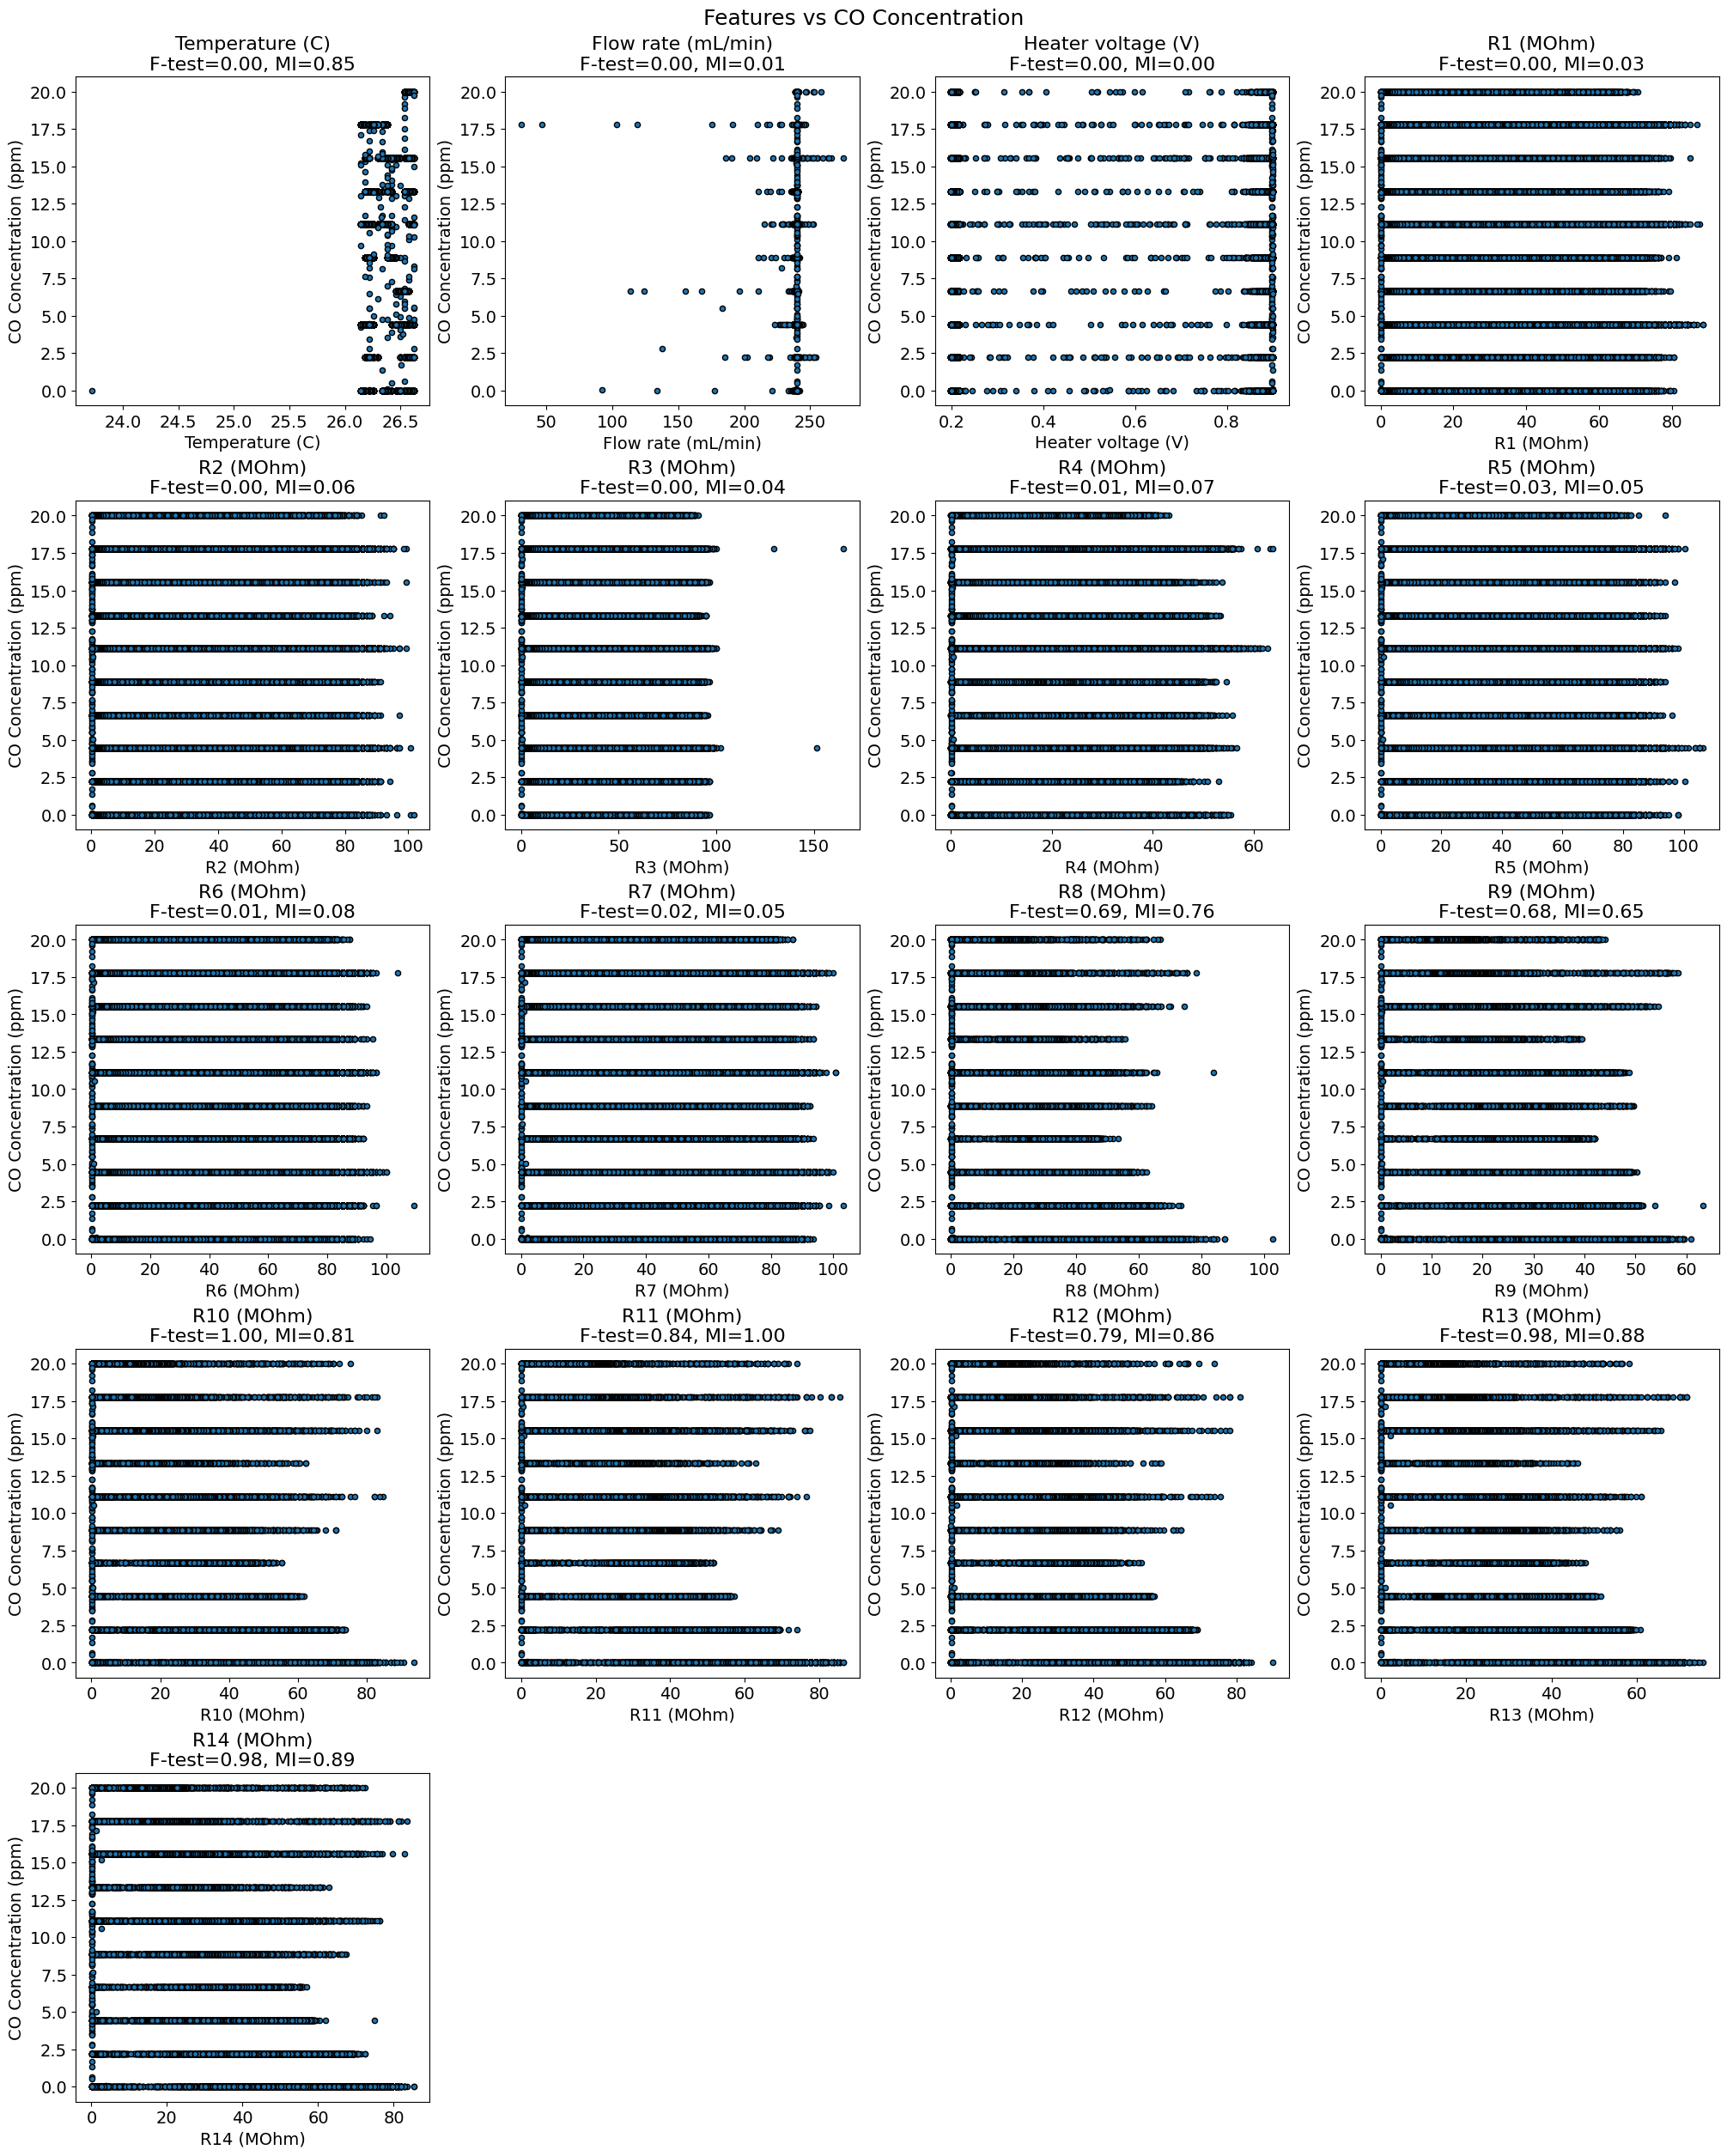

In [75]:
# Plot features vs CO, also display normalized f test features and normalized mutual info features
plt.figure(figsize=(20, 25), layout = "constrained")
num_features = len(x1_train_no_time.columns)
for i in range(num_features):
    feature_name = x1_train_no_time.columns[i]
    plt.subplot((num_features + 4) // 4, 4, i + 1)
    plt.scatter(x1_train_no_time.iloc[:,i], y_co_train, edgecolor="black", s=20)
    plt.xlabel(feature_name, fontsize= 14)
    plt.ylabel("CO Concentration (ppm)", fontsize= 14)
    plt.title("{}\nF-test={:.2f}, MI={:.2f}".format(feature_name, f_test_co_norm[i], mi_co_norm[i]), fontsize=16)
    plt.tick_params(labelsize = 14)
plt.suptitle("Features vs CO Concentration", fontsize= 18)
plt.show()

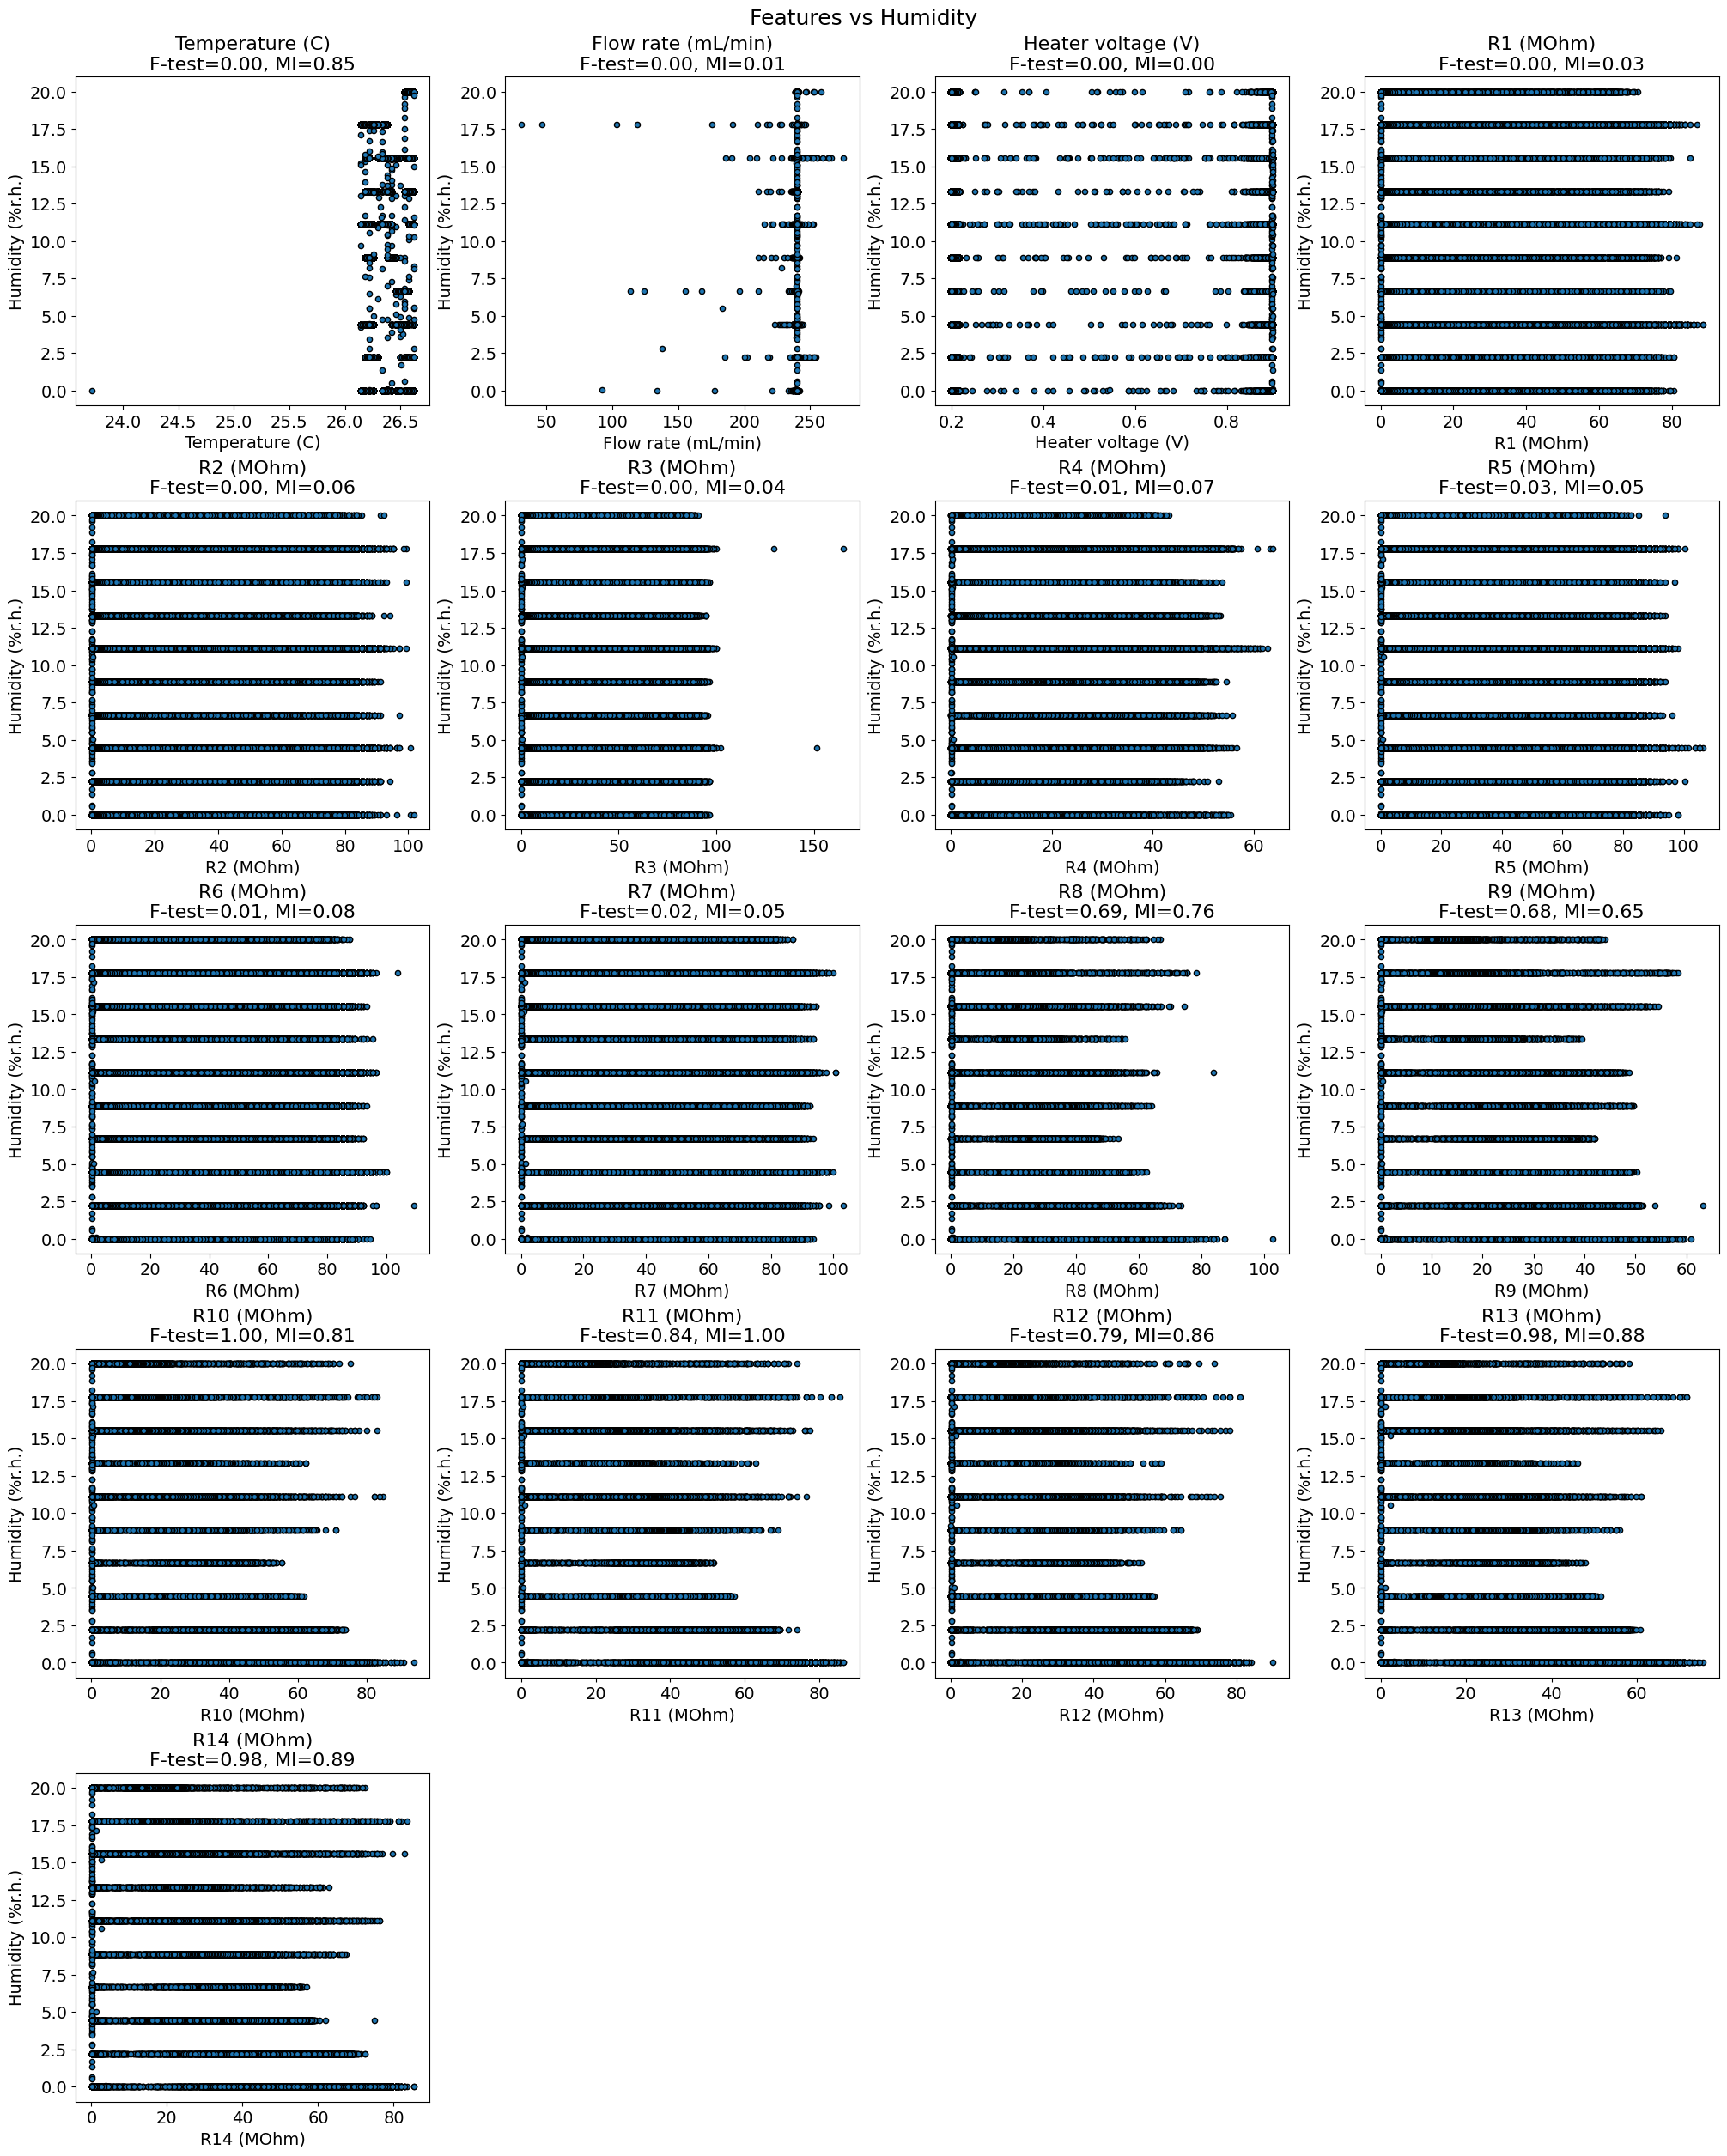

In [76]:
# Plot features vs CO, also display normalized f test features and normalized mutual info features
plt.figure(figsize=(20, 25), layout = "constrained")
num_features = len(x1_train_no_time.columns)
for i in range(num_features):
    feature_name = x1_train_no_time.columns[i]
    plt.subplot((num_features + 4) // 4, 4, i + 1)
    plt.scatter(x1_train_no_time.iloc[:,i], y_co_train, edgecolor="black", s=20)
    plt.xlabel(feature_name, fontsize= 14)
    plt.ylabel("Humidity (%r.h.)", fontsize= 14)
    plt.title("{}\nF-test={:.2f}, MI={:.2f}".format(feature_name, f_test_co_norm[i], mi_co_norm[i]), fontsize=16)
    plt.tick_params(labelsize = 14)
plt.suptitle("Features vs Humidity", fontsize= 18)
plt.show()

##  Do bar plots of the F-test values and minimum info test values

In [77]:
tuples_f_test_co = sorted(zip(f_test_co, x1_train_no_time.columns), reverse=True)
co_f_score_list, co_f_test_features = [t[0] for t in tuples_f_test_co], [t[1] for t in tuples_f_test_co]
tuples_f_test_h = sorted(zip(f_test_h, x1_train_no_time.columns), reverse=True)
h_f_score_list, h_f_test_features = [t[0] for t in tuples_f_test_h], [t[1] for t in tuples_f_test_h]
tuples_mi_co = sorted(zip(mi_co , x1_train_no_time.columns), reverse=True)
co_mi_score_list, co_mi_features = [t[0] for t in tuples_mi_co], [t[1] for t in tuples_mi_co]
tuples_mi_h = sorted(zip(mi_h, x1_train_no_time.columns), reverse=True)
h_mi_score_list, h_mi_features = [t[0] for t in tuples_mi_h], [t[1] for t in tuples_mi_h]

C:\Users\jacob\AppData\Local\Temp\ipykernel_34348\1560810329.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(co_f_test_features, rotation = 45)
C:\Users\jacob\AppData\Local\Temp\ipykernel_34348\1560810329.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(h_f_test_features, rotation = 45)
C:\Users\jacob\AppData\Local\Temp\ipykernel_34348\1560810329.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(co_mi_features, rotation = 45)
C:\Users\jacob\AppData\Local\Temp\ipykernel_34348\1560810329.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(h_mi_features, rotation = 45)

Text(0.5, 1.0, 'H Mutual Info Values of Features')

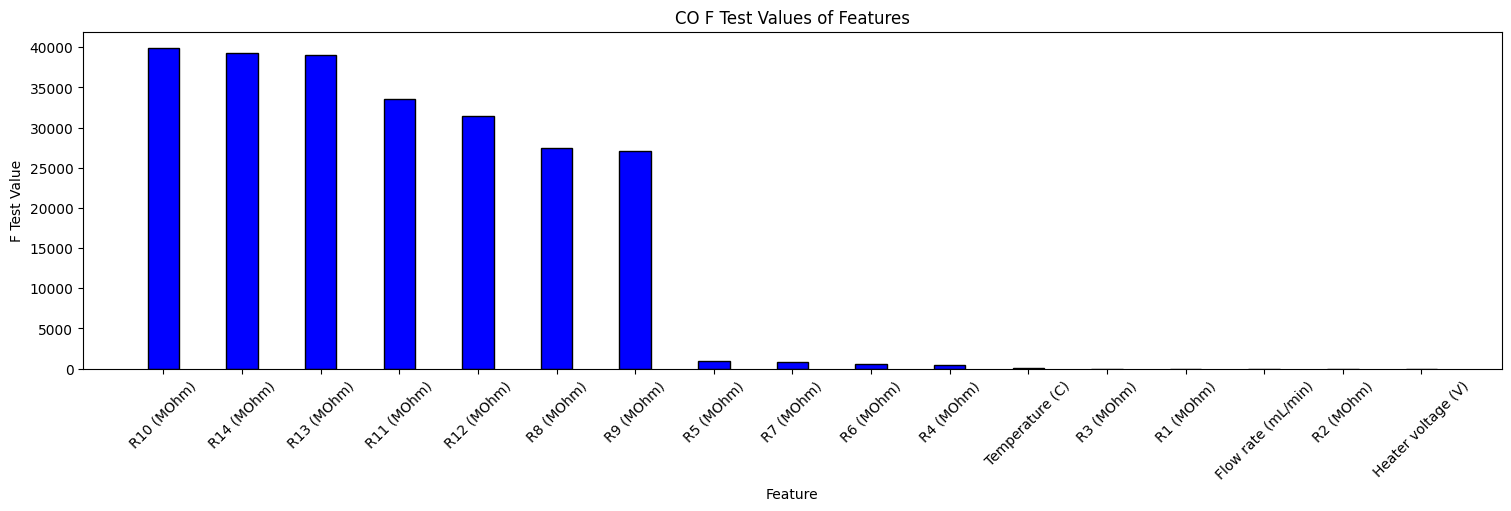

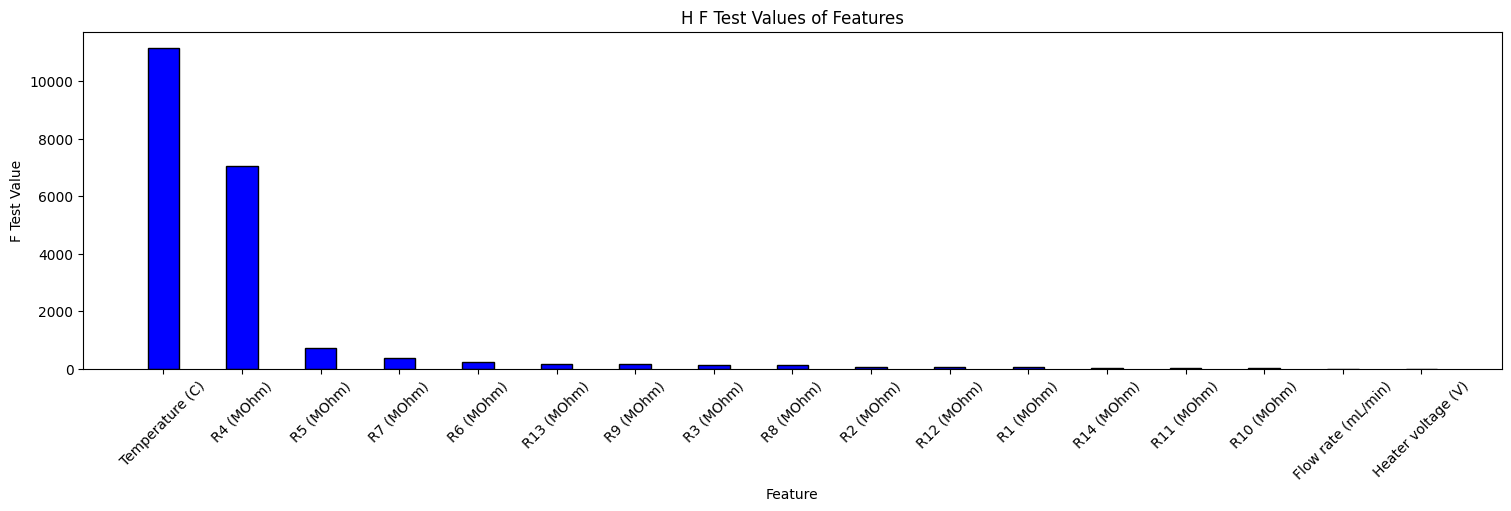

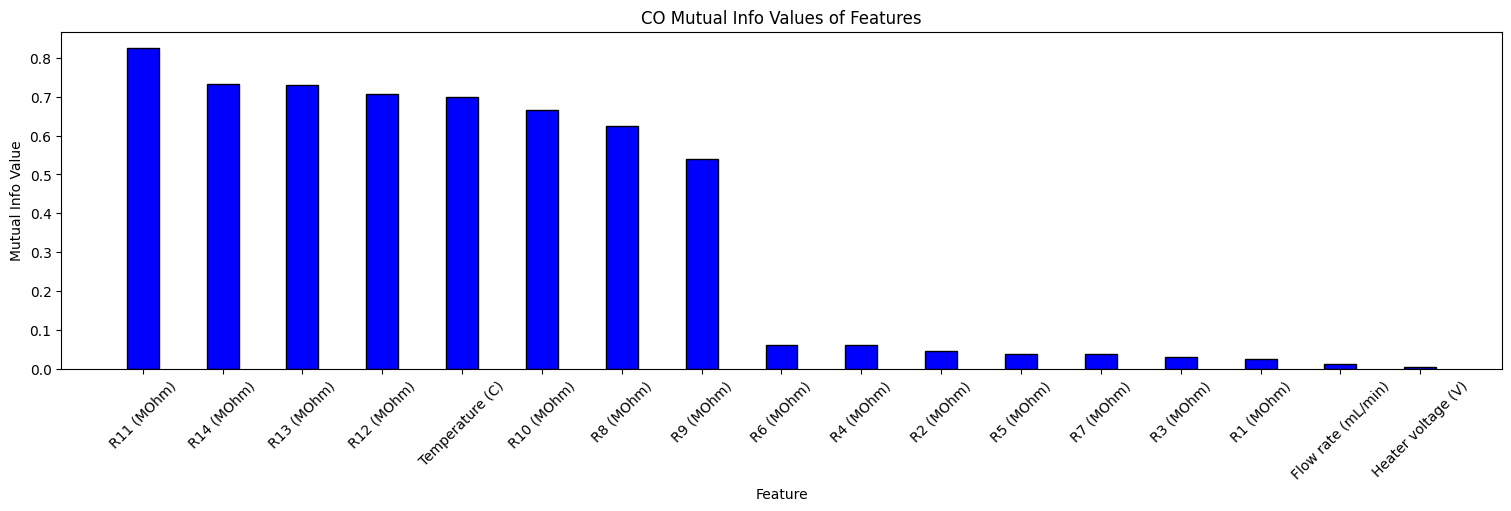

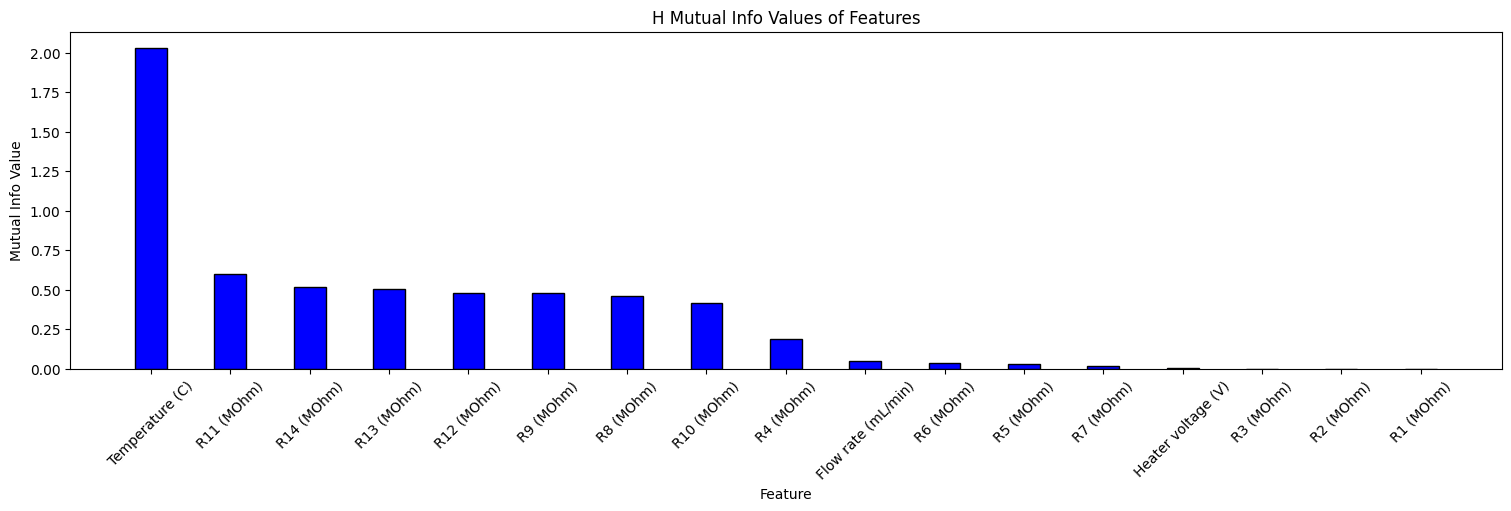

In [79]:
fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(co_f_test_features, co_f_score_list, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(co_f_test_features, rotation = 45)
ax1.set_ylabel("F Test Value")
ax1.set_xlabel("Feature")
ax1.set_title("CO F Test Values of Features")

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(h_f_test_features, h_f_score_list, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(h_f_test_features, rotation = 45)
ax1.set_ylabel("F Test Value")
ax1.set_xlabel("Feature")
ax1.set_title("H F Test Values of Features")

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(co_mi_features, co_mi_score_list, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(co_mi_features, rotation = 45)
ax1.set_ylabel("Mutual Info Value")
ax1.set_xlabel("Feature")
ax1.set_title("CO Mutual Info Values of Features")

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(h_mi_features, h_mi_score_list, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(h_mi_features, rotation = 45)
ax1.set_ylabel("Mutual Info Value")
ax1.set_xlabel("Feature")
ax1.set_title("H Mutual Info Values of Features")

## Do bar plots of the normalized F-test values and minimum info test values

In [80]:
tuples_f_test_co_norm = sorted(zip(f_test_co_norm, x1_train_no_time.columns), reverse=True)
co_f_score_list_norm, co_f_test_features_norm = [t[0] for t in tuples_f_test_co_norm], [t[1] for t in tuples_f_test_co_norm]
tuples_f_test_h_norm = sorted(zip(f_test_h_norm, x1_train_no_time.columns), reverse=True)
h_f_score_list_norm, h_f_test_features_norm = [t[0] for t in tuples_f_test_h_norm], [t[1] for t in tuples_f_test_h_norm]
tuples_mi_co_norm = sorted(zip(mi_co_norm, x1_train_no_time.columns), reverse=True)
co_mi_score_list_norm, co_mi_features_norm = [t[0] for t in tuples_mi_co_norm], [t[1] for t in tuples_mi_co_norm]
tuples_mi_h_norm = sorted(zip(mi_h_norm, x1_train_no_time.columns), reverse=True)
h_mi_score_list_norm, h_mi_features_norm = [t[0] for t in tuples_mi_h_norm], [t[1] for t in tuples_mi_h_norm]

C:\Users\jacob\AppData\Local\Temp\ipykernel_34348\1055818748.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(co_f_test_features, rotation = 45)
C:\Users\jacob\AppData\Local\Temp\ipykernel_34348\1055818748.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(h_f_test_features_norm, rotation = 45)
C:\Users\jacob\AppData\Local\Temp\ipykernel_34348\1055818748.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(co_mi_features_norm, rotation = 45)
C:\Users\jacob\AppData\Local\Temp\ipykernel_34348\1055818748.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(h_mi_features_norm,

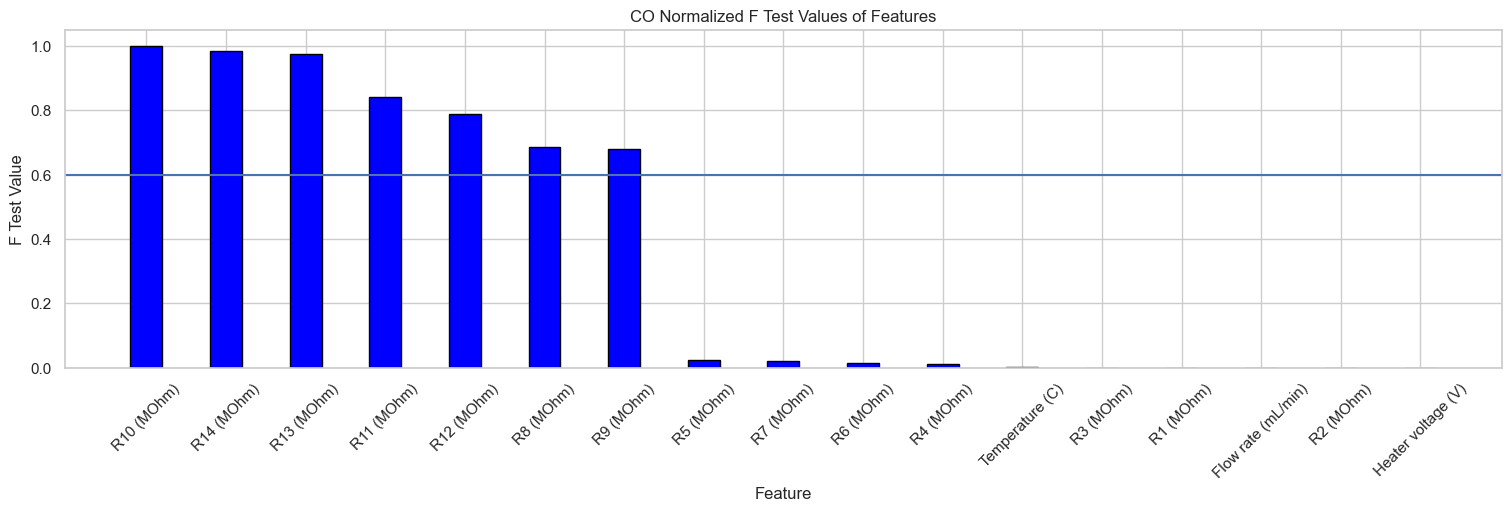

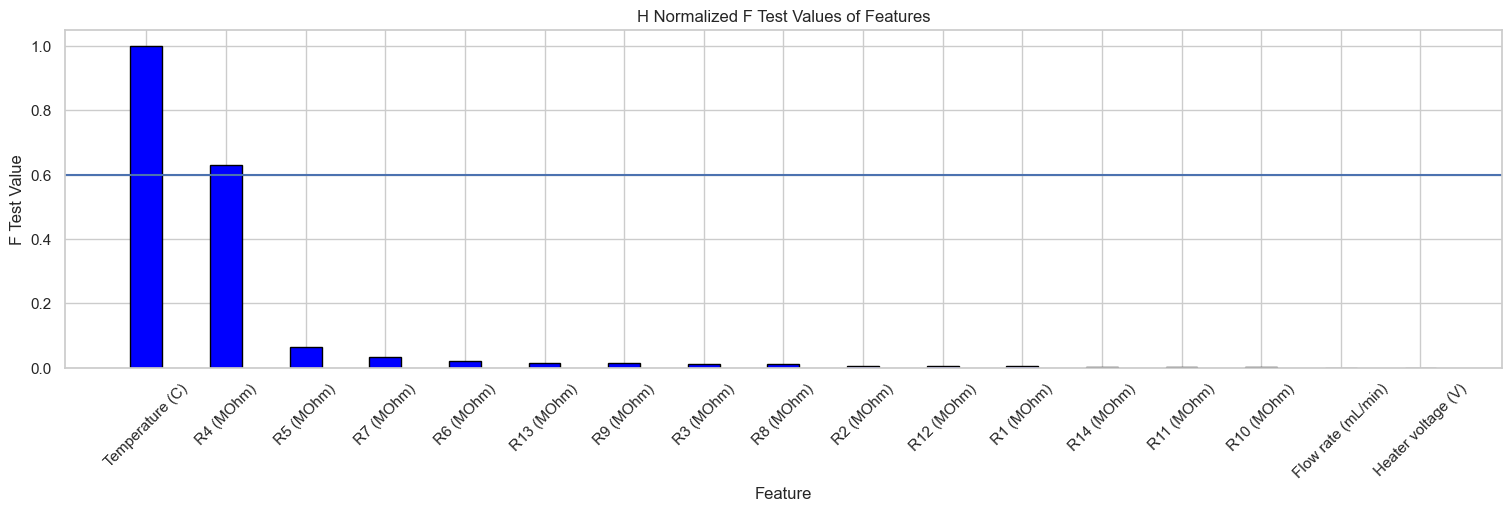

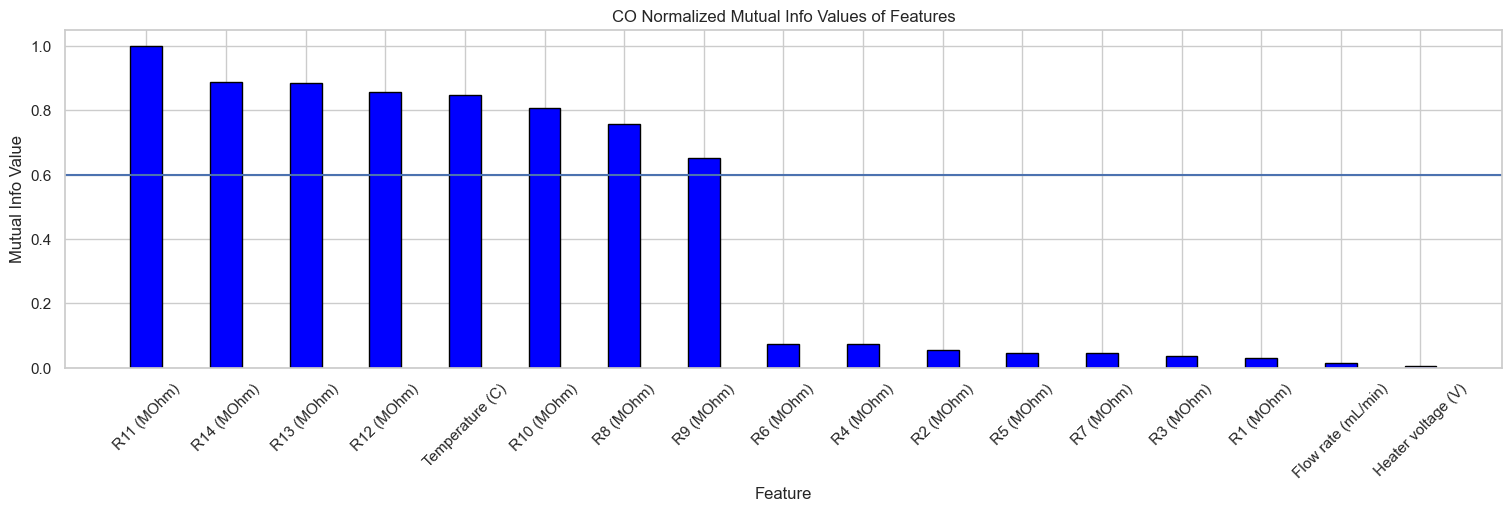

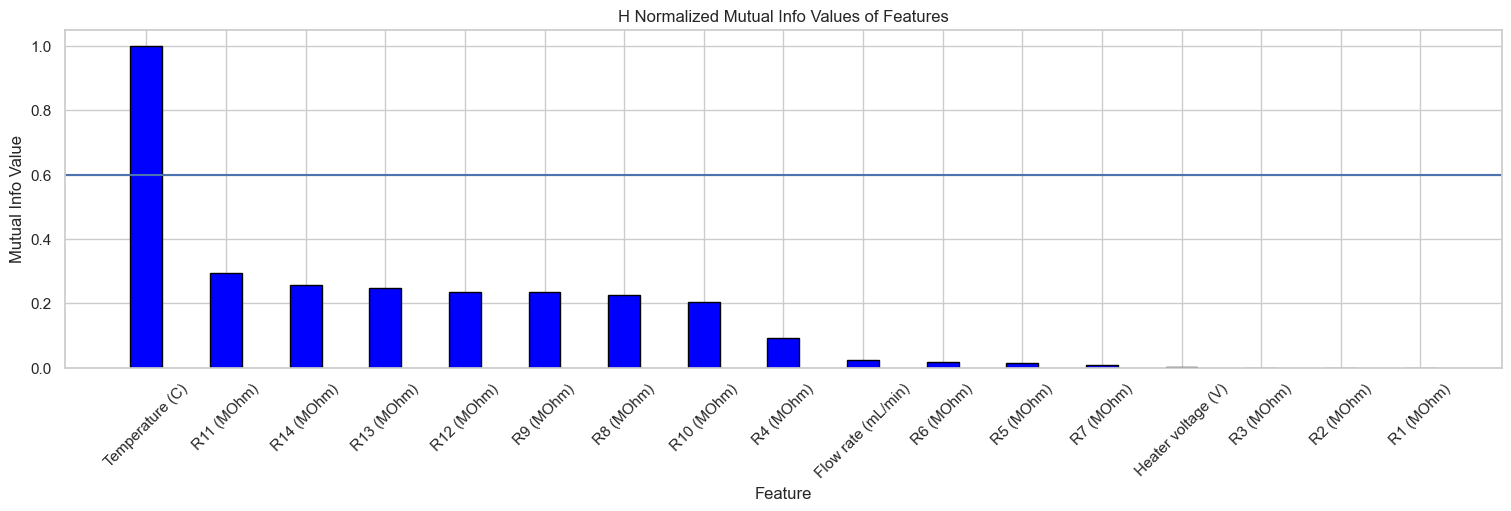

In [151]:
cutoff = 0.6
fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(co_f_test_features_norm, co_f_score_list_norm, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(co_f_test_features, rotation = 45)
ax1.set_ylabel("F Test Value")
ax1.set_xlabel("Feature")
ax1.set_title("CO Normalized F Test Values of Features")
ax1.axhline(cutoff)

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(h_f_test_features_norm, h_f_score_list_norm, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(h_f_test_features_norm, rotation = 45)
ax1.set_ylabel("F Test Value")
ax1.set_xlabel("Feature")
ax1.set_title("H Normalized F Test Values of Features")
ax1.axhline(cutoff)

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(co_mi_features_norm, co_mi_score_list_norm, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(co_mi_features_norm, rotation = 45)
ax1.set_ylabel("Mutual Info Value")
ax1.set_xlabel("Feature")
ax1.set_title("CO Normalized Mutual Info Values of Features")
ax1.axhline(cutoff)

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(h_mi_features_norm, h_mi_score_list_norm, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(h_mi_features_norm, rotation = 45)
ax1.set_ylabel("Mutual Info Value")
ax1.set_xlabel("Feature")
ax1.set_title("H Normalized Mutual Info Values of Features")
ax1.axhline(cutoff)

# Now remove Features that fall below the cutoff
Cutoff is drop features with F-test and mutual info test less than 0.7

In [152]:
# go through and find sensors that don't meet the cutoff
good_co_sensors = []
good_h_sensors = []

# Create a dictionary of the tuples containing both the feature name and list, so we can give the sensor name and get a score value back
mi_co_norm_dict = {}
for tuple in tuples_mi_co_norm:
    mi_co_norm_dict[tuple[1]] = tuple[0]
mi_h_norm_dict = {}
for tuple in tuples_mi_h_norm:
    mi_h_norm_dict[tuple[1]] = tuple[0]

for i in range(len(co_f_test_features_norm)):
    curr_sensor = co_f_test_features_norm[i]
    # Keep the sensor if it meets the cutoff
    if not (co_f_score_list_norm[i] < cutoff and mi_co_norm_dict[curr_sensor] < cutoff):
        good_co_sensors.append(curr_sensor)
for i in range(len(h_f_test_features_norm)):
    curr_sensor = h_f_test_features_norm[i]
    # Keep the sensor if it meets the cutoff
    if not (h_f_score_list_norm[i] < cutoff and mi_h_norm_dict[curr_sensor] < cutoff):
        good_h_sensors.append(curr_sensor)   
print("Kept CO sensors:", good_co_sensors, "\nKept Humidity sensors:", good_h_sensors)


Kept CO sensors: ['R10 (MOhm)', 'R14 (MOhm)', 'R13 (MOhm)', 'R11 (MOhm)', 'R12 (MOhm)', 'R8 (MOhm)', 'R9 (MOhm)', 'Temperature (C)'] 
Kept Humidity sensors: ['Temperature (C)', 'R4 (MOhm)']


In [153]:
co_cutoff_train = x1_train[good_co_sensors]
co_cutoff_test = x1_test[good_co_sensors]
co_cutoff_deployment = x1_deployment[good_co_sensors]
h_cutoff_train = x1_train[good_h_sensors]
h_cutoff_test = x1_test[good_h_sensors]
h_cutoff_deployment = x1_deployment[good_h_sensors]

# Feature Engineering

We need to add historical measurements as features. 

In [154]:
def get_historical_measurements(orig_df, window_size, sampling_rate):
    '''Appends historical measurements to a dataframe'''
    orig_cols = orig_df.columns
    # Go through and make the window and append it as features. There will be window_size / sampling_rate features added for each feature
    for i in range(window_size//sampling_rate):
        # Shift the values over (get time t - 1)
        shift_val = sampling_rate * (i + 1)
        orig_df_shifted = orig_df[orig_cols].shift(shift_val).bfill()
        orig_df_shifted.columns = ["{}_(t-{})".format(col, shift_val) for col in list(orig_df_shifted.columns)]
        orig_df = pd.concat([orig_df, orig_df_shifted], axis = 1)
    return orig_df

In [155]:
window_size = 50
sampling_rate = 5

In [156]:
co_historical_train = get_historical_measurements(co_cutoff_train, window_size, sampling_rate)
h_historical_train = get_historical_measurements(h_cutoff_train, window_size, sampling_rate)
co_historical_test = get_historical_measurements(co_cutoff_test, window_size, sampling_rate)
h_historical_test = get_historical_measurements(h_cutoff_test, window_size, sampling_rate)
co_historical_deployment = get_historical_measurements(co_cutoff_deployment, window_size, sampling_rate)
h_historical_deployment = get_historical_measurements(h_cutoff_deployment, window_size, sampling_rate)

In [157]:
co_historical_train.columns

Index(['R10 (MOhm)', 'R14 (MOhm)', 'R13 (MOhm)', 'R11 (MOhm)', 'R12 (MOhm)',
       'R8 (MOhm)', 'R9 (MOhm)', 'Temperature (C)', 'R10 (MOhm)_(t-5)',
       'R14 (MOhm)_(t-5)', 'R13 (MOhm)_(t-5)', 'R11 (MOhm)_(t-5)',
       'R12 (MOhm)_(t-5)', 'R8 (MOhm)_(t-5)', 'R9 (MOhm)_(t-5)',
       'Temperature (C)_(t-5)', 'R10 (MOhm)_(t-10)', 'R14 (MOhm)_(t-10)',
       'R13 (MOhm)_(t-10)', 'R11 (MOhm)_(t-10)', 'R12 (MOhm)_(t-10)',
       'R8 (MOhm)_(t-10)', 'R9 (MOhm)_(t-10)', 'Temperature (C)_(t-10)',
       'R10 (MOhm)_(t-15)', 'R14 (MOhm)_(t-15)', 'R13 (MOhm)_(t-15)',
       'R11 (MOhm)_(t-15)', 'R12 (MOhm)_(t-15)', 'R8 (MOhm)_(t-15)',
       'R9 (MOhm)_(t-15)', 'Temperature (C)_(t-15)', 'R10 (MOhm)_(t-20)',
       'R14 (MOhm)_(t-20)', 'R13 (MOhm)_(t-20)', 'R11 (MOhm)_(t-20)',
       'R12 (MOhm)_(t-20)', 'R8 (MOhm)_(t-20)', 'R9 (MOhm)_(t-20)',
       'Temperature (C)_(t-20)', 'R10 (MOhm)_(t-25)', 'R14 (MOhm)_(t-25)',
       'R13 (MOhm)_(t-25)', 'R11 (MOhm)_(t-25)', 'R12 (MOhm)_(t-25)',
      

We need to get features.
Statistical - Mean, median, Range, Standard Deviation, Max, Min, Kurtosis, Skewness 
Time / Frequency - Autocorrelation, entropy, Positive Turning, Negative Turning, Peak to peak distance

In [104]:
def find_positive_turning_points(signal):
    # From tsfresh
    # Calculate differences
    diff_sig = np.diff(signal)
    array_signal = np.arange(len(diff_sig[:-1]))
    positive_turning_pts = np.where((diff_sig[array_signal + 1] < 0) & (diff_sig[array_signal] > 0))[0]
    
    return len(positive_turning_pts)

In [105]:
def find_negative_turning_points(signal):
    # From tsfresh
    # Calculate differences
    diff_sig = np.diff(signal)
    array_signal = np.arange(len(diff_sig[:-1]))
    negative_turning_pts = np.where((diff_sig[array_signal] < 0) & (diff_sig[array_signal + 1] > 0))[0]

    return len(negative_turning_pts)

In [106]:
def get_features(window_df, orig_cols, window_size, sampling_rate):
    '''Gets statistical and time features from data frame'''
    window_df_copy = window_df.copy()
    num_orig_cols = len(orig_cols)
    for i in range(len(orig_cols)):
        # Get the current columns
        curr_cols = list(range(i, i + window_size // sampling_rate * num_orig_cols + 1, num_orig_cols))
        print("Getting features for:", list(window_df.iloc[:,curr_cols].columns))
        # We can get a measurement on axis = 1 since we already have the previous measurements in the dataframe
        window_df_copy["{}_mean".format(orig_cols[i])] = window_df.iloc[:,curr_cols].mean(axis = 1)
        print("Calculated mean")
        window_df_copy["{}_median".format(orig_cols[i])] = window_df.iloc[:,curr_cols].median(axis = 1)
        print("Calculated median")
        window_df_copy["{}_max".format(orig_cols[i])] = window_df.iloc[:,curr_cols].max(axis = 1)
        print("Calculated max")
        window_df_copy["{}_min".format(orig_cols[i])] = window_df.iloc[:,curr_cols].min(axis = 1)
        print("Calculated min")
        window_df_copy["{}_std".format(orig_cols[i])] = window_df.iloc[:,curr_cols].std(axis = 1)
        print("Calculated std")
        window_df_copy["{}_range".format(orig_cols[i])] =window_df.iloc[:,curr_cols].apply(lambda row: max(row) - min(row), axis = 1)
        print("Calculated range")
        window_df_copy["{}_skew".format(orig_cols[i])] = window_df.iloc[:,curr_cols].skew(axis = 1)
        print("Calculated skewness")
        window_df_copy["{}_kurtosis".format(orig_cols[i])] = window_df.iloc[:,curr_cols].kurtosis(axis = 1)
        print("Calculated kurtosis")
        
        window_df_copy["{}_autocorrelation".format(orig_cols[i])] = window_df.iloc[window_size:,curr_cols].apply(lambda row: row.autocorr(1), axis = 1)
        # Backfill is necessary because we can't get autocorrelation before row = window size 
        window_df_copy["{}_autocorrelation".format(orig_cols[i])] = window_df_copy["{}_autocorrelation".format(orig_cols[i])].bfill()
        print("Calculated autocorrelation")
        
        window_df_copy["{}_positive_turning_points".format(orig_cols[i])] = window_df.iloc[window_size:,curr_cols].apply(lambda row: find_positive_turning_points(row), axis = 1)
        window_df_copy["{}_positive_turning_points".format(orig_cols[i])] = window_df_copy["{}_positive_turning_points".format(orig_cols[i])].bfill()
        print("Calculated number of positive turning points")
        
        window_df_copy["{}_negative_turning_points".format(orig_cols[i])] = window_df.iloc[window_size:,curr_cols].apply(lambda row: find_positive_turning_points(row), axis = 1)
        window_df_copy["{}_negative_turning_points".format(orig_cols[i])] = window_df_copy["{}_negative_turning_points".format(orig_cols[i])].bfill()
        print("Calculated number of negative turning points")
        
    return window_df_copy

In [158]:
x_co_fe_train = get_features(co_historical_train, co_cutoff_train.columns, window_size, sampling_rate)
x_co_fe_train.info()

Getting features for: ['R10 (MOhm)', 'R10 (MOhm)_(t-5)', 'R10 (MOhm)_(t-10)', 'R10 (MOhm)_(t-15)', 'R10 (MOhm)_(t-20)', 'R10 (MOhm)_(t-25)', 'R10 (MOhm)_(t-30)', 'R10 (MOhm)_(t-35)', 'R10 (MOhm)_(t-40)', 'R10 (MOhm)_(t-45)', 'R10 (MOhm)_(t-50)']
Calculated mean
Calculated median
Calculated max
Calculated min
Calculated std
Calculated range
Calculated skewness
Calculated kurtosis
Calculated autocorrelation
Calculated number of positive turning points
Calculated number of negative turning points
Getting features for: ['R14 (MOhm)', 'R14 (MOhm)_(t-5)', 'R14 (MOhm)_(t-10)', 'R14 (MOhm)_(t-15)', 'R14 (MOhm)_(t-20)', 'R14 (MOhm)_(t-25)', 'R14 (MOhm)_(t-30)', 'R14 (MOhm)_(t-35)', 'R14 (MOhm)_(t-40)', 'R14 (MOhm)_(t-45)', 'R14 (MOhm)_(t-50)']
Calculated mean
Calculated median
Calculated max
Calculated min
Calculated std
Calculated range
Calculated skewness
Calculated kurtosis
Calculated autocorrelation
Calculated number of positive turning points
Calculated number of negative turning points
Ge

c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Calculated autocorrelation
Calculated number of positive turning points
Calculated number of negative turning points
<class 'pandas.core.frame.DataFrame'>
Index: 118287 entries, 0 to 118286
Columns: 176 entries, R10 (MOhm) to Temperature (C)_negative_turning_points
dtypes: float64(176)
memory usage: 163.8 MB


In [159]:
x_h_fe_train = get_features(h_historical_train, h_cutoff_train.columns, window_size, sampling_rate)
x_co_fe_test = get_features(co_historical_test, co_cutoff_test.columns, window_size, sampling_rate)
x_h_fe_test = get_features(h_historical_test, h_cutoff_test.columns, window_size, sampling_rate)
x_co_fe_deployment = get_features(co_historical_deployment, co_cutoff_deployment.columns, window_size, sampling_rate)
x_h_fe_deployment = get_features(h_historical_deployment, h_cutoff_deployment.columns, window_size, sampling_rate)

Getting features for: ['Temperature (C)', 'Temperature (C)_(t-5)', 'Temperature (C)_(t-10)', 'Temperature (C)_(t-15)', 'Temperature (C)_(t-20)', 'Temperature (C)_(t-25)', 'Temperature (C)_(t-30)', 'Temperature (C)_(t-35)', 'Temperature (C)_(t-40)', 'Temperature (C)_(t-45)', 'Temperature (C)_(t-50)']
Calculated mean
Calculated median
Calculated max
Calculated min
Calculated std
Calculated range
Calculated skewness
Calculated kurtosis


c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Calculated autocorrelation
Calculated number of positive turning points
Calculated number of negative turning points
Getting features for: ['R4 (MOhm)', 'R4 (MOhm)_(t-5)', 'R4 (MOhm)_(t-10)', 'R4 (MOhm)_(t-15)', 'R4 (MOhm)_(t-20)', 'R4 (MOhm)_(t-25)', 'R4 (MOhm)_(t-30)', 'R4 (MOhm)_(t-35)', 'R4 (MOhm)_(t-40)', 'R4 (MOhm)_(t-45)', 'R4 (MOhm)_(t-50)']
Calculated mean
Calculated median
Calculated max
Calculated min
Calculated std
Calculated range
Calculated skewness
Calculated kurtosis
Calculated autocorrelation
Calculated number of positive turning points
Calculated number of negative turning points
Getting features for: ['R10 (MOhm)', 'R10 (MOhm)_(t-5)', 'R10 (MOhm)_(t-10)', 'R10 (MOhm)_(t-15)', 'R10 (MOhm)_(t-20)', 'R10 (MOhm)_(t-25)', 'R10 (MOhm)_(t-30)', 'R10 (MOhm)_(t-35)', 'R10 (MOhm)_(t-40)', 'R10 (MOhm)_(t-45)', 'R10 (MOhm)_(t-50)']
Calculated mean
Calculated median
Calculated max
Calculated min
Calculated std
Calculated range
Calculated skewness
Calculated kurtosis
Calculated au

c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Calculated autocorrelation
Calculated number of positive turning points
Calculated number of negative turning points
Getting features for: ['Temperature (C)', 'Temperature (C)_(t-5)', 'Temperature (C)_(t-10)', 'Temperature (C)_(t-15)', 'Temperature (C)_(t-20)', 'Temperature (C)_(t-25)', 'Temperature (C)_(t-30)', 'Temperature (C)_(t-35)', 'Temperature (C)_(t-40)', 'Temperature (C)_(t-45)', 'Temperature (C)_(t-50)']
Calculated mean
Calculated median
Calculated max
Calculated min
Calculated std
Calculated range
Calculated skewness
Calculated kurtosis


c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Calculated autocorrelation
Calculated number of positive turning points
Calculated number of negative turning points
Getting features for: ['R4 (MOhm)', 'R4 (MOhm)_(t-5)', 'R4 (MOhm)_(t-10)', 'R4 (MOhm)_(t-15)', 'R4 (MOhm)_(t-20)', 'R4 (MOhm)_(t-25)', 'R4 (MOhm)_(t-30)', 'R4 (MOhm)_(t-35)', 'R4 (MOhm)_(t-40)', 'R4 (MOhm)_(t-45)', 'R4 (MOhm)_(t-50)']
Calculated mean
Calculated median
Calculated max
Calculated min
Calculated std
Calculated range
Calculated skewness
Calculated kurtosis
Calculated autocorrelation
Calculated number of positive turning points
Calculated number of negative turning points
Getting features for: ['R10 (MOhm)', 'R10 (MOhm)_(t-5)', 'R10 (MOhm)_(t-10)', 'R10 (MOhm)_(t-15)', 'R10 (MOhm)_(t-20)', 'R10 (MOhm)_(t-25)', 'R10 (MOhm)_(t-30)', 'R10 (MOhm)_(t-35)', 'R10 (MOhm)_(t-40)', 'R10 (MOhm)_(t-45)', 'R10 (MOhm)_(t-50)']
Calculated mean
Calculated median
Calculated max
Calculated min
Calculated std
Calculated range
Calculated skewness
Calculated kurtosis
Calculated au

c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Calculated autocorrelation
Calculated number of positive turning points
Calculated number of negative turning points
Getting features for: ['Temperature (C)', 'Temperature (C)_(t-5)', 'Temperature (C)_(t-10)', 'Temperature (C)_(t-15)', 'Temperature (C)_(t-20)', 'Temperature (C)_(t-25)', 'Temperature (C)_(t-30)', 'Temperature (C)_(t-35)', 'Temperature (C)_(t-40)', 'Temperature (C)_(t-45)', 'Temperature (C)_(t-50)']
Calculated mean
Calculated median
Calculated max
Calculated min
Calculated std
Calculated range
Calculated skewness
Calculated kurtosis


c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Calculated autocorrelation
Calculated number of positive turning points
Calculated number of negative turning points
Getting features for: ['R4 (MOhm)', 'R4 (MOhm)_(t-5)', 'R4 (MOhm)_(t-10)', 'R4 (MOhm)_(t-15)', 'R4 (MOhm)_(t-20)', 'R4 (MOhm)_(t-25)', 'R4 (MOhm)_(t-30)', 'R4 (MOhm)_(t-35)', 'R4 (MOhm)_(t-40)', 'R4 (MOhm)_(t-45)', 'R4 (MOhm)_(t-50)']
Calculated mean
Calculated median
Calculated max
Calculated min
Calculated std
Calculated range
Calculated skewness
Calculated kurtosis
Calculated autocorrelation
Calculated number of positive turning points
Calculated number of negative turning points


## Add Ratios

# Load the Feature Engineered Datasets

In [160]:
def get_ratios(orig_df):
    '''Gets ratios of all columns'''
    df_copy = orig_df.copy()
    cols = df_copy.columns
    for i in range(len(cols)):
        for j in range(len(cols)):
            if i != j:
                curr_col = cols[i]
                compare_col = cols[j]
                df_copy["{}/{}".format(curr_col,compare_col)] =  df_copy[curr_col] / df_copy[compare_col]
    return df_copy

In [161]:
co_ratio_train = get_ratios(co_cutoff_train)

In [162]:
co_ratio_test = get_ratios(co_cutoff_test)
co_ratio_deployment = get_ratios(co_cutoff_deployment)
h_ratio_train = get_ratios(h_cutoff_train)
h_ratio_test = get_ratios(h_cutoff_test)
h_ratio_deployment = get_ratios(h_cutoff_deployment)

In [ ]:
## Combine Ratios and Other Features

In [164]:
x_co_feratio_train = pd.concat([x_co_fe_train, co_ratio_train.drop(columns = co_cutoff_train.columns)], axis = 1)
x_co_feratio_test = pd.concat([x_co_fe_test, co_ratio_test.drop(columns = co_cutoff_test.columns)], axis = 1)
x_co_feratio_deployment = pd.concat([x_co_fe_deployment, co_ratio_deployment.drop(columns = co_cutoff_deployment.columns)], axis = 1)
x_h_feratio_train = pd.concat([x_h_fe_train, h_ratio_train.drop(columns = h_cutoff_train.columns)], axis = 1)
x_h_feratio_test = pd.concat([x_h_fe_test, h_ratio_test.drop(columns = h_cutoff_test.columns)], axis = 1)
x_h_feratio_deployment = pd.concat([x_h_fe_deployment, h_ratio_deployment.drop(columns = h_cutoff_deployment.columns)], axis = 1)

# Save Feature Engineered Datasets
So we don't have to do feature engineering again.

In [165]:
co_fe_train_df = pd.concat([x_co_feratio_train, y_co_train], axis = 1)
co_fe_train_df.to_csv("gas-sensor-array-temperature-modulation/co_fe_train.csv")
h_fe_train_df = pd.concat([x_h_feratio_train, y_h_train], axis = 1)
h_fe_train_df.to_csv("gas-sensor-array-temperature-modulation/h_fe_train.csv")
co_fe_test_df = pd.concat([x_co_feratio_test, y_co_test], axis = 1)
co_fe_test_df.to_csv("gas-sensor-array-temperature-modulation/co_fe_test.csv")
h_fe_test_df = pd.concat([x_h_feratio_test, y_h_test], axis = 1)
h_fe_test_df.to_csv("gas-sensor-array-temperature-modulation/h_fe_test.csv")
co_fe_deployment_df = pd.concat([x_co_feratio_deployment, y_co_deployment], axis = 1)
co_fe_deployment_df.to_csv("gas-sensor-array-temperature-modulation/co_fe_deployment.csv")
h_fe_deployment_df = pd.concat([x_h_feratio_deployment, y_h_deployment], axis = 1)
h_fe_deployment_df.to_csv("gas-sensor-array-temperature-modulation/h_fe_deployment.csv")

# Load the Feature Engineered Datasets

In [9]:
co_fe_train_df = pd.read_csv('gas-sensor-array-temperature-modulation/co_fe_train.csv', index_col = 0)
h_fe_train_df = pd.read_csv('gas-sensor-array-temperature-modulation/h_fe_train.csv', index_col = 0)
co_fe_test_df = pd.read_csv('gas-sensor-array-temperature-modulation/co_fe_test.csv', index_col = 0)
h_fe_test_df = pd.read_csv('gas-sensor-array-temperature-modulation/h_fe_test.csv', index_col = 0)

In [175]:
co_fe_deployment_df = pd.read_csv('gas-sensor-array-temperature-modulation/co_fe_deployment.csv', index_col = 0)
h_fe_deployment_df = pd.read_csv('gas-sensor-array-temperature-modulation/h_fe_deployment.csv', index_col = 0)

# Split the Dataframes into X Sets

In [10]:
x_co_feratio_train = co_fe_train_df.drop(["CO (ppm)"], axis = 1)
x_h_feratio_train = h_fe_train_df.drop(["Humidity (%r.h.)"], axis = 1)
x_co_feratio_test = co_fe_test_df.drop(["CO (ppm)"], axis = 1)
x_h_feratio_test = h_fe_test_df.drop(["Humidity (%r.h.)"], axis = 1)

In [11]:
x_co_feratio_train.shape, x_h_feratio_train.shape

((118287, 232), (118287, 46))

# Delete Data frames to save space

In [12]:
del co_fe_train_df
del h_fe_train_df
del co_fe_test_df
del h_fe_test_df
del co_fe_deployment_df
del h_fe_deployment_df


NameError: name 'co_fe_deployment_df' is not defined

# Redo EDA

# Define Helper Functions

## Define Metrics Function to easily get metrics

In [13]:
def get_main_metrics(actual, predict):
  '''Returns a tuple containing RMSE, RMSE / mean, RMSE / range, MAPE, MAE, and R^2'''
  # Calculate rmse
  rmse = mean_squared_error(actual, predict, squared = False)

  # Calculate mean and range
  print(rmse)
  mean = np.mean(actual)

  range_val = np.max(actual) - np.min(actual)
  print(np.max(actual), np.min(actual), range_val)
  # Calculate MAPE and MAE
  mape = mean_absolute_percentage_error(actual, predict)
  mae = mean_absolute_error(actual, predict)
  r2_val = r2_score(actual, predict)
  return (rmse, rmse/mean, rmse/range_val, mape, mae, r2_val)

## Define GridSearchCV Helper Functions

In [14]:
model_collections = {}

In [15]:
def optimize_halving_model(model, param_grid, scoring, get_metrics, cv, verbose, n_jobs, x_train, y_train, x_test, y_test):
  """Optimizes a model given a parameter grid and a scaler using HalvingGridSearchCV"""
  try:
    grid = HalvingGridSearchCV(estimator= model,
                      param_grid = param_grid,
                      scoring=scoring,
                      cv=cv, 
                      verbose = verbose,
                      n_jobs=n_jobs)
    # Run fit on the GridSearchCV which will search for the best parameters
    grid_results = grid.fit(x_train, y_train)
    # Run predictions on the test dataset
    best_model_predictions = grid.predict(x_test)
    metrics = None
    if get_metrics:
        metrics = get_main_metrics(y_test, best_model_predictions)
    return (grid_results, y_test, best_model_predictions, metrics, grid_results.best_params_, grid_results.best_score_)
  except Exception as e:
    return ["error",[],str(e)]

# Compare Linear Regression Results With No Other Preprocessing

Redo EDA

In [ ]:
# Perform Robust Scaler on Data 

In [16]:
# Create scaler
robust_co_scaler = RobustScaler()
robust_h_scaler = RobustScaler()

In [17]:
# First, train all the data on the scalers
robust_co_scaler.fit(x_co_feratio_train, y_train)
robust_h_scaler.fit(x_h_feratio_train, y_train)

RobustScaler()

In [18]:
# Second, transform all the train data on the fitted scalers
x_co_train_fe_robust = robust_co_scaler.transform(x_co_feratio_train)
x_h_train_fe_robust = robust_h_scaler.transform(x_h_feratio_train)

In [19]:
# Third, transform all the test data on the fitted scalers
x_co_test_fe_robust = robust_co_scaler.transform(x_co_feratio_test)
x_h_test_fe_robust = robust_h_scaler.transform(x_h_feratio_test)

# Perform Power Transformer on Data 

In [20]:
# Create transformers
co_power_transformer = PowerTransformer()
h_power_transformer = PowerTransformer()

In [21]:
# First, train all the data on the transformers
co_power_transformer.fit(x_co_train_fe_robust, y_train)
h_power_transformer.fit(x_h_train_fe_robust, y_train)

PowerTransformer()

In [22]:
# Second, transform all the train data on the fitted scalers
x_co_train_ferp = co_power_transformer.transform(x_co_train_fe_robust)
x_h_train_ferp = h_power_transformer.transform(x_h_train_fe_robust)

In [23]:
# Third, transform all the test data on the fitted scalers
x_co_test_ferp = co_power_transformer.transform(x_co_test_fe_robust)
x_h_test_ferp = h_power_transformer.transform(x_h_test_fe_robust)

# Perform Principal Component Analysis (PCA)

In [24]:
# Replace all nan values with 0
x_co_train_ferp = np.nan_to_num(x_co_train_ferp, copy=True, nan=0.0, posinf=None, neginf=None)
x_h_train_ferp = np.nan_to_num(x_h_train_ferp, copy=True, nan=0.0, posinf=None, neginf=None)
x_co_test_ferp = np.nan_to_num(x_co_test_ferp, copy=True, nan=0.0, posinf=None, neginf=None)
x_h_test_ferp = np.nan_to_num(x_h_test_ferp, copy=True, nan=0.0, posinf=None, neginf=None)

In [25]:
pca_co = PCA()
pca_co.fit(x_co_train_ferp)
pca_h = PCA()
pca_h.fit(x_h_train_ferp)

PCA()

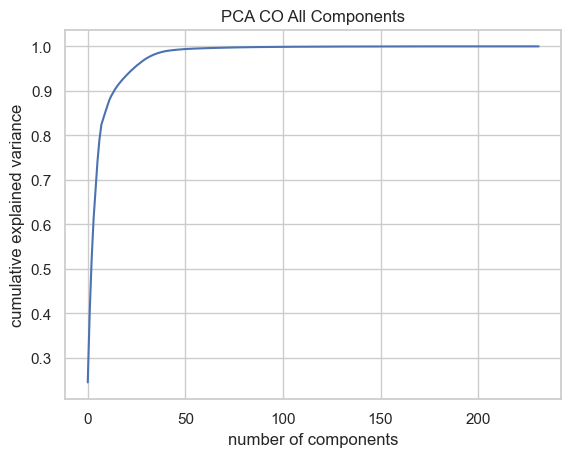

None

In [26]:
# Make plots of cumulative explained variance
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_co.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("PCA CO All Components")
# plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())

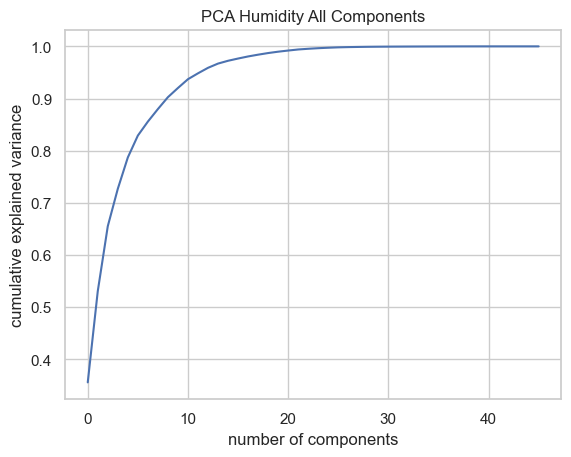

None

In [27]:
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_h.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("PCA Humidity All Components")
# plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())

In [191]:
x_co_train_ferp.shape

(118287, 232)

In [29]:
# Implement 0.95 variance threshold
pca_co_best = PCA(n_components=0.99)
pca_co_best.fit(x_co_train_ferp)
pca_h_best = PCA(n_components=0.99)
pca_h_best.fit(x_h_train_ferp)

PCA(n_components=0.99)

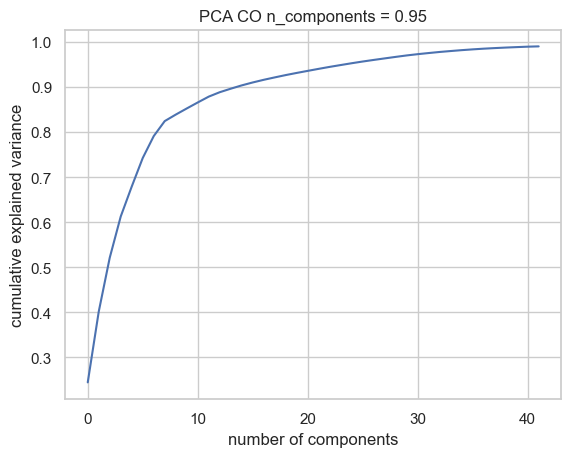

None

In [30]:
# Make plots of cumulative explained variance
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_co_best.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("PCA CO n_components = 0.95")
# plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())

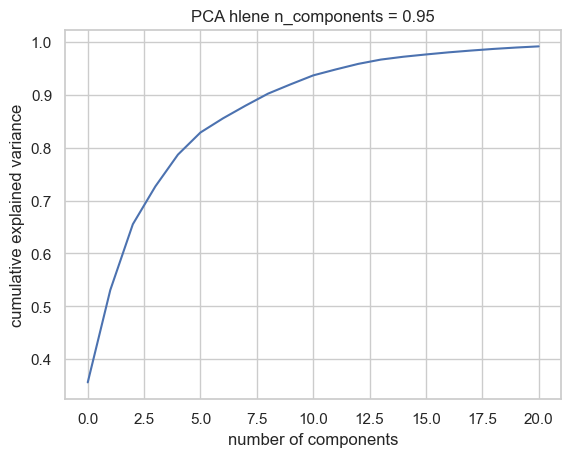

None

In [31]:
# Make plots of cumulative explained variance
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_h_best.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("PCA hlene n_components = 0.95")
# plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())

In [32]:
# Fit the PCA on the data
x_co_train_preprocessed = pca_co_best.transform(x_co_train_ferp)
x_h_train_preprocessed = pca_h_best.transform(x_h_train_ferp)
x_co_test_preprocessed = pca_co_best.transform(x_co_test_ferp)
x_h_test_preprocessed = pca_h_best.transform(x_h_test_ferp)

# Run Models

# Run Elastic Net

In [200]:
elastic_net_param_grid = {
    'alpha': [0.01, 0.1, 1, 2],
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
}

In [199]:
from sklearn.linear_model import ElasticNet

In [201]:
optim_enet_co = optimize_halving_model(ElasticNet(), elastic_net_param_grid, "neg_root_mean_squared_error", True, 5, 10, -1, x_co_train_preprocessed, y_co_train, x_co_test_preprocessed, y_co_test)
print(optim_enet_co[3:])
model_collections["optim_enet_co"] = optim_enet_co

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 13143
max_resources_: 118287
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 20
n_resources: 13143
Fitting 5 folds for each of 20 candidates, totalling 100 fits
----------
iter: 1
n_candidates: 7
n_resources: 39429
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 2
n_candidates: 3
n_resources: 118287
Fitting 5 folds for each of 3 candidates, totalling 15 fits
3.1161658853657603
20.0 0.0 20.0
((3.1161658853657603, 0.29900340718380936, 0.15580829426828802, 1114728240886038.0, 1.8570207765116704, 0.7961159523382962), {'alpha': 0.01, 'l1_ratio': 1}, -2.6068931900825336)


In [202]:
joblib.dump(optim_enet_co, "models/best_co_fmi_enet.pkl")

['models/best_co_fmi_enet.pkl']

In [203]:
optim_enet_h = optimize_halving_model(ElasticNet(), elastic_net_param_grid, "neg_root_mean_squared_error", True, 5, 10, -1, x_h_train_preprocessed, y_h_train, x_h_test_preprocessed, y_h_test)
print(optim_enet_h[3:])
model_collections["optim_enet_h"] = optim_enet_h

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 13143
max_resources_: 118287
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 20
n_resources: 13143
Fitting 5 folds for each of 20 candidates, totalling 100 fits


----------
iter: 1
n_candidates: 7
n_resources: 39429
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 2
n_candidates: 3
n_resources: 118287
Fitting 5 folds for each of 3 candidates, totalling 15 fits
5.220752505098235
71.96 17.5 54.459999999999994
((5.220752505098235, 0.11330494137542867, 0.09586398283323973, 0.10489859961915861, 3.909507963637362, 0.856470784261627), {'alpha': 0.01, 'l1_ratio': 1}, -4.055972196929037)


In [204]:
joblib.dump(optim_enet_h, "models/best_h_fmi_enet.pkl")

['models/best_h_fmi_enet.pkl']

# Run Linear SVR

In [205]:
linear_svr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'epsilon': [0, 0.1, 1],
    'verbose': [10],
}

In [206]:
optim_lsvr_co = optimize_halving_model(LinearSVR(), linear_svr_param_grid, "neg_root_mean_squared_error", True, 5, 10, -1, x_co_train_preprocessed, y_co_train, x_co_test_preprocessed, y_co_test)
print(optim_lsvr_co[3:])
model_collections["optim_lsvr_co"] = optim_lsvr_co

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 13143
max_resources_: 118287
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 15
n_resources: 13143
Fitting 5 folds for each of 15 candidates, totalling 75 fits
----------
iter: 1
n_candidates: 5
n_resources: 39429
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 2
n_candidates: 2
n_resources: 118287
Fitting 5 folds for each of 2 candidates, totalling 10 fits


c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[LibLinear]3.270355845112731
20.0 0.0 20.0
((3.270355845112731, 0.3137982945594752, 0.16351779225563653, 909985915982759.0, 1.8926054602624232, 0.7754401391898242), {'C': 0.1, 'epsilon': 1, 'verbose': 10}, -2.64136038387083)


c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [207]:
joblib.dump(optim_lsvr_co, "models/best_co_fmi_lsvr.pkl")

['models/best_co_fmi_lsvr.pkl']

In [208]:
optim_lsvr_h = optimize_halving_model(LinearSVR(), linear_svr_param_grid, "neg_root_mean_squared_error", True, 5, 10, -1, x_h_train_preprocessed, y_h_train, x_h_test_preprocessed, y_h_test)
print(optim_lsvr_h[3:])
model_collections["optim_lsvr_h"] = optim_lsvr_h

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 13143
max_resources_: 118287
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 15
n_resources: 13143
Fitting 5 folds for each of 15 candidates, totalling 75 fits
----------
iter: 1
n_candidates: 5
n_resources: 39429
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 2
n_candidates: 2
n_resources: 118287
Fitting 5 folds for each of 2 candidates, totalling 10 fits


c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[LibLinear]5.2546609855322775
71.96 17.5 54.459999999999994
((5.2546609855322775, 0.114040850305024, 0.09648661376298712, 0.10344265347196531, 3.7708218417503825, 0.85460030196018), {'C': 0.1, 'epsilon': 1, 'verbose': 10}, -4.136680618691665)


In [209]:
joblib.dump(optim_lsvr_h, "models/best_h_fmi_lsvr.pkl")

['models/best_h_fmi_lsvr.pkl']

# Run MLPR

In [216]:
mlpr_param_grid = {
    'activation': ['relu'],
    'hidden_layer_sizes': [(50, 50, 50, 50), (50, 50, 50), (50, 50)],
    'alpha': [0.1, 0.01, 0.001],
    'batch_size': [200, 400, 600],
    'learning_rate': ['adaptive'],
    'max_iter': [1000],
    'early_stopping': [True],
    'n_iter_no_change': [40]
}

In [217]:
optim_mlpr_co = optimize_halving_model(MLPRegressor(), mlpr_param_grid, "neg_root_mean_squared_error", True, 5, 10, -1, x_co_train_preprocessed, y_co_train, x_co_test_preprocessed, y_co_test)
print(optim_mlpr_co[3:])
model_collections["optim_mlpr_co"] = optim_mlpr_co

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 4381
max_resources_: 118287
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 27
n_resources: 4381
Fitting 5 folds for each of 27 candidates, totalling 135 fits
----------
iter: 1
n_candidates: 9
n_resources: 13143
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 2
n_candidates: 3
n_resources: 39429
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 3
n_candidates: 1
n_resources: 118287
Fitting 5 folds for each of 1 candidates, totalling 5 fits
3.1430087685567933
20.0 0.0 20.0
((3.1430087685567933, 0.30157904462674795, 0.15715043842783966, 1819480330935169.5, 2.1153373977558547, 0.7925882791761187), {'activation': 'relu', 'alpha': 0.1, 'batch_size': 400, 'early_stopping': True, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'max_iter': 1000, 'n_iter_no_change': 40}, -2.888859493497209)


In [218]:
joblib.dump(optim_mlpr_co, "models/best_co_fmi_mlpr.pkl")

['models/best_co_fmi_mlpr.pkl']

In [219]:
optim_mlpr_h = optimize_halving_model(MLPRegressor(), mlpr_param_grid, "neg_root_mean_squared_error", True, 5, 10, -1, x_h_train_preprocessed, y_h_train, x_h_test_preprocessed, y_h_test)
print(optim_mlpr_h[3:])
model_collections["optim_mlpr_h"] = optim_mlpr_h

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 4381
max_resources_: 118287
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 27
n_resources: 4381
Fitting 5 folds for each of 27 candidates, totalling 135 fits
----------
iter: 1
n_candidates: 9
n_resources: 13143
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 2
n_candidates: 3
n_resources: 39429
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 3
n_candidates: 1
n_resources: 118287
Fitting 5 folds for each of 1 candidates, totalling 5 fits
4.583988498624214
71.96 17.5 54.459999999999994
((4.583988498624214, 0.09948538023877897, 0.08417165807242406, 0.0912427317148091, 3.3505744644647844, 0.8893475232266101), {'activation': 'relu', 'alpha': 0.01, 'batch_size': 200, 'early_stopping': True, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'max_iter': 1000, 'n_iter_no_change': 40}, -3.414826069273887)


In [220]:
joblib.dump(optim_mlpr_h, "models/best_h_fmi_mlpr.pkl")

['models/best_h_fmi_mlpr.pkl']

# Run Gradient Boosting

In [52]:
gradient_boosting_param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [30, 40, 50, 60, 70, 80, 90],
    'loss': ["huber"],
    'max_depth': [2, 3, 4],
    'max_features': [3, 4, 5, 6],
}


In [222]:
optim_gb_co = optimize_halving_model(GradientBoostingRegressor(), gradient_boosting_param_grid, "neg_root_mean_squared_error", True, 5, 10, -1, x_co_train_preprocessed, y_co_train, x_co_test_preprocessed, y_co_test)
print(optim_gb_co[3:])
model_collections["optim_gb_co"] = optim_gb_co

n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 486
max_resources_: 118287
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 252
n_resources: 486
Fitting 5 folds for each of 252 candidates, totalling 1260 fits
----------
iter: 1
n_candidates: 84
n_resources: 1458
Fitting 5 folds for each of 84 candidates, totalling 420 fits
----------
iter: 2
n_candidates: 28
n_resources: 4374
Fitting 5 folds for each of 28 candidates, totalling 140 fits
----------
iter: 3
n_candidates: 10
n_resources: 13122
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 4
n_candidates: 4
n_resources: 39366
Fitting 5 folds for each of 4 candidates, totalling 20 fits
3.1123243029612855
20.0 0.0 20.0
((3.1123243029612855, 0.2986347983644555, 0.15561621514806429, 894963289161347.8, 1.8923220846514137, 0.7966183354685346), {'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 4, 'max_features': 5, 'n_estimators': 90}, -2.611918256422507)

In [223]:
joblib.dump(optim_gb_co, "models/best_co_fmi_gb.pkl")

['models/best_co_fmi_gb.pkl']

In [53]:
optim_gb_h = optimize_halving_model(GradientBoostingRegressor(), gradient_boosting_param_grid, "neg_root_mean_squared_error", True, 5, 10, -1, x_h_train_preprocessed, y_h_train, x_h_test_preprocessed, y_h_test)
print(optim_gb_h[3:])
model_collections["optim_gb_h"] = optim_gb_h

n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 486
max_resources_: 118287
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 252
n_resources: 486
Fitting 5 folds for each of 252 candidates, totalling 1260 fits
----------
iter: 1
n_candidates: 84
n_resources: 1458
Fitting 5 folds for each of 84 candidates, totalling 420 fits
----------
iter: 2
n_candidates: 28
n_resources: 4374
Fitting 5 folds for each of 28 candidates, totalling 140 fits
----------
iter: 3
n_candidates: 10
n_resources: 13122
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 4
n_candidates: 4
n_resources: 39366
Fitting 5 folds for each of 4 candidates, totalling 20 fits
5.130262654757193
71.96 17.5 54.459999999999994
((5.130262654757193, 0.11134105835704179, 0.09420239909579863, 0.10995287062138337, 4.040915497125295, 0.8614031686595112), {'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 4, 'max_features': 6, 'n_estimators': 90}, -4.

In [54]:
joblib.dump(optim_gb_h, "models/best_h_fmi_gb.pkl")

['models/best_h_fmi_gb.pkl']

# Run XGBoost

In [33]:
Xgboost_paragram_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [38]:
optim_xgb_co = optimize_halving_model(XGBRegressor(), Xgboost_paragram_grid, "neg_root_mean_squared_error", True, 5, 10, -1, x_co_train_preprocessed, y_co_train, x_co_test_preprocessed, y_co_test)
print(optim_xgb_co[3:])
model_collections["optim_xgb_co"] = optim_xgb_co

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 1460
max_resources_: 118287
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 243
n_resources: 1460
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
----------
iter: 1
n_candidates: 81
n_resources: 4380
Fitting 5 folds for each of 81 candidates, totalling 405 fits
----------
iter: 2
n_candidates: 27
n_resources: 13140
Fitting 5 folds for each of 27 candidates, totalling 135 fits
----------
iter: 3
n_candidates: 9
n_resources: 39420
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 4
n_candidates: 3
n_resources: 118260
Fitting 5 folds for each of 3 candidates, totalling 15 fits
2.8748764743581665
20.0 0.0 20.0
((2.8748764743581665, 0.2758511236845704, 0.14374382371790834, 1683627315731842.0, 1.8338989165938326, 0.8264676343117157), {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}, -2.35666

In [39]:
joblib.dump(optim_xgb_co, "models/best_co_fmi_xgb.pkl")

['models/best_co_fmi_xgb.pkl']

In [40]:
del model_collections["optim_xgb_co"]

In [49]:
optim_xgb_h = optimize_halving_model(XGBRegressor(), Xgboost_paragram_grid, "neg_root_mean_squared_error", True, 5, 10, -1, x_h_train_preprocessed, y_h_train, x_h_test_preprocessed, y_h_test)
print(optim_xgb_h[3:])
model_collections["optim_xgb_h"] = optim_xgb_h

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 1460
max_resources_: 118287
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 243
n_resources: 1460
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
----------
iter: 1
n_candidates: 81
n_resources: 4380
Fitting 5 folds for each of 81 candidates, totalling 405 fits
----------
iter: 2
n_candidates: 27
n_resources: 13140
Fitting 5 folds for each of 27 candidates, totalling 135 fits
----------
iter: 3
n_candidates: 9
n_resources: 39420
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 4
n_candidates: 3
n_resources: 118260
Fitting 5 folds for each of 3 candidates, totalling 15 fits
4.555648950462663
71.96 17.5 54.459999999999994
((4.555648950462663, 0.09887033272600855, 0.08365128443743414, 0.08924900516686113, 3.465547195111888, 0.8907114655031542), {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 300, 'subsample':

In [50]:
joblib.dump(optim_xgb_h, "models/best_h_fmi_xgb.pkl")

['models/best_h_fmi_xgb.pkl']

# Run Random Forest Regressor

In [240]:
random_forest_param_grid = {
    'n_estimators': [500],
    'max_depth': [6, 7, 8, 9], 
    'max_features': [3,4,5,6], 
    'criterion': ['absolute_error'],
    'n_jobs': [-1]
}

In [241]:
optim_rf_co = optimize_halving_model(RandomForestRegressor(), random_forest_param_grid, "neg_root_mean_squared_error", True, 5, 10, -1, x_co_train_preprocessed, y_co_train, x_co_test_preprocessed, y_co_test)
print(optim_rf_co[3:])
model_collections["optim_rf_co"] = optim_rf_co

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 13143
max_resources_: 118287
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 16
n_resources: 13143
Fitting 5 folds for each of 16 candidates, totalling 80 fits


KeyboardInterrupt: 

In [ ]:
joblib.dump(optim_rf_co, "models/best_co_fmi_rf.pkl")

In [ ]:
optim_rf_h = optimize_halving_model(RandomForestRegressor(), random_forest_param_grid, "neg_root_mean_squared_error", True, 5, 10, -1, x_h_train_preprocessed, y_h_train, x_h_test_preprocessed, y_h_test)
print(optim_rf_h[3:])
model_collections["optim_rf_h"] = optim_rf_h

In [ ]:
joblib.dump(optim_rf_h, "models/best_h_fmi_rf.pkl")

# Load the Models

In [55]:
model_collections = {}

In [56]:
model_collections["best_co_fmi_lsvr"] = joblib.load("models/best_co_fmi_lsvr.pkl")
model_collections["best_h_fmi_lsvr"] = joblib.load("models/best_h_fmi_lsvr.pkl")
model_collections["best_co_fmi_mlpr"] = joblib.load("models/best_co_fmi_mlpr.pkl")
model_collections["best_h_fmi_mlpr"] = joblib.load("models/best_h_fmi_mlpr.pkl")
model_collections["best_co_fmi_enet"] = joblib.load("models/best_co_fmi_enet.pkl")
model_collections["best_h_fmi_enet"] = joblib.load("models/best_h_fmi_enet.pkl")
model_collections["best_co_fmi_xgb"] = joblib.load("models/best_co_fmi_xgb.pkl")
model_collections["best_h_fmi_xgb"] = joblib.load("models/best_h_fmi_xgb.pkl")
model_collections["best_co_fmi_gb"] = joblib.load("models/best_co_fmi_gb.pkl")
model_collections["best_h_fmi_gb"] = joblib.load("models/best_h_fmi_gb.pkl")

# Do Data Analysis on Residuals and Predicted Values

C:\Users\jacob\AppData\Local\Temp\ipykernel_34576\856388726.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(best_model_labels, rotation = 45)
C:\Users\jacob\AppData\Local\Temp\ipykernel_34576\856388726.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(best_model_labels, rotation = 45)
C:\Users\jacob\AppData\Local\Temp\ipykernel_34576\856388726.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(best_model_labels, rotation = 45)
C:\Users\jacob\AppData\Local\Temp\ipykernel_34576\856388726.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(best_model_labels, rotation = 

Text(0.5, 1.0, 'R^2 of Hypertuned Models')

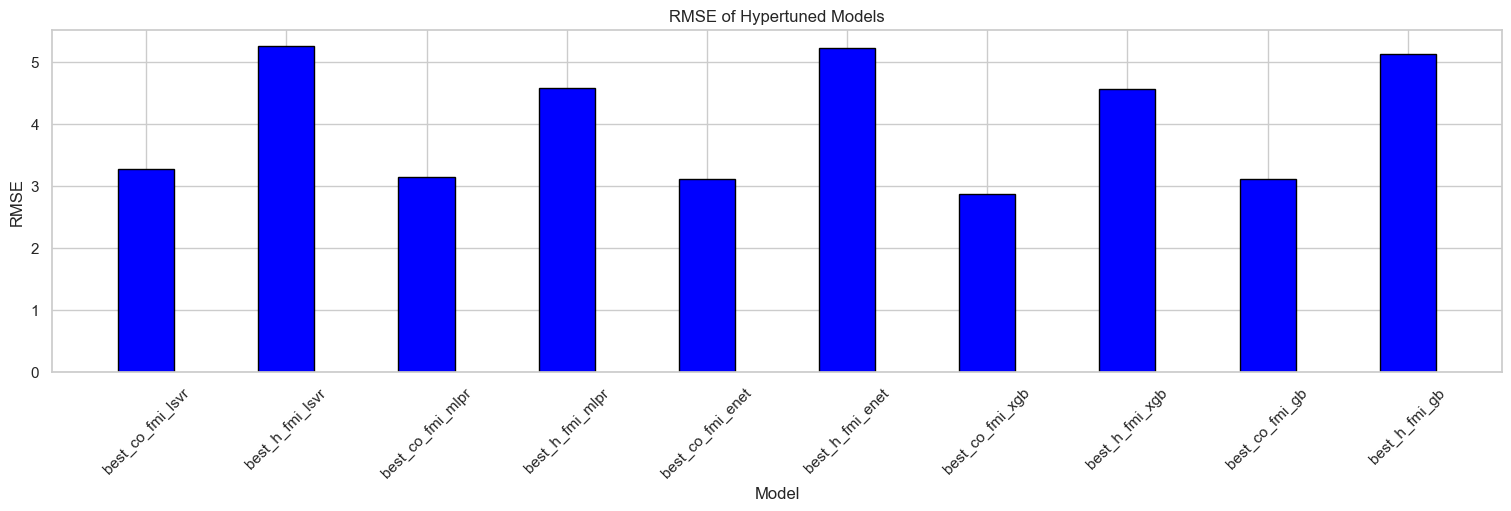

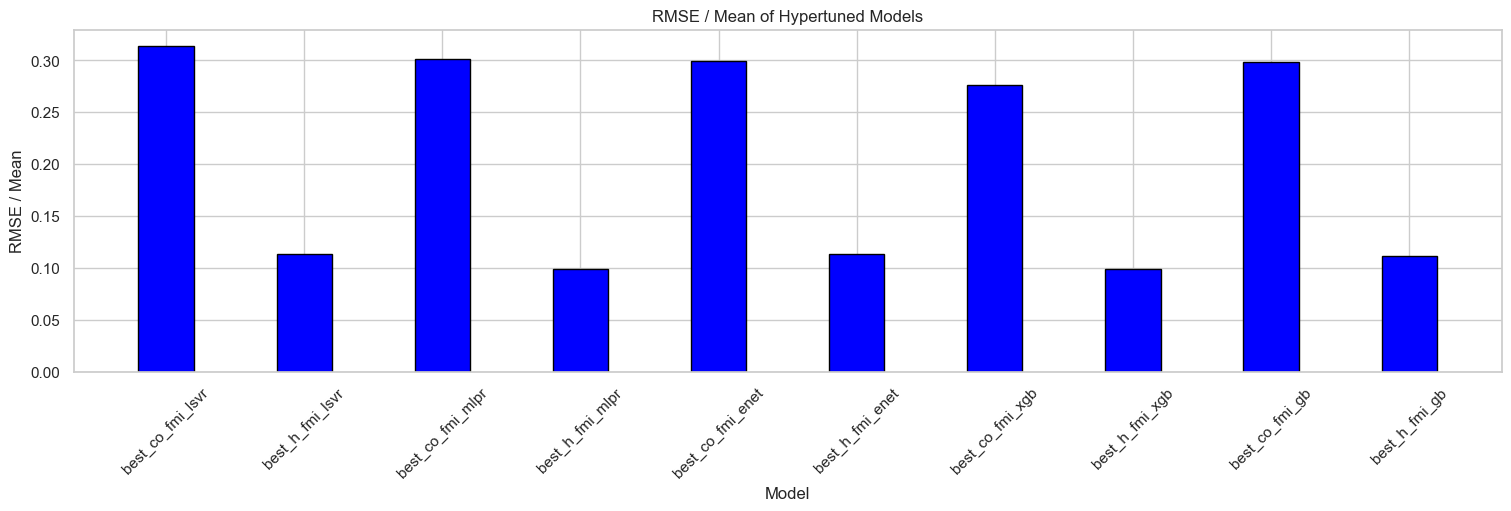

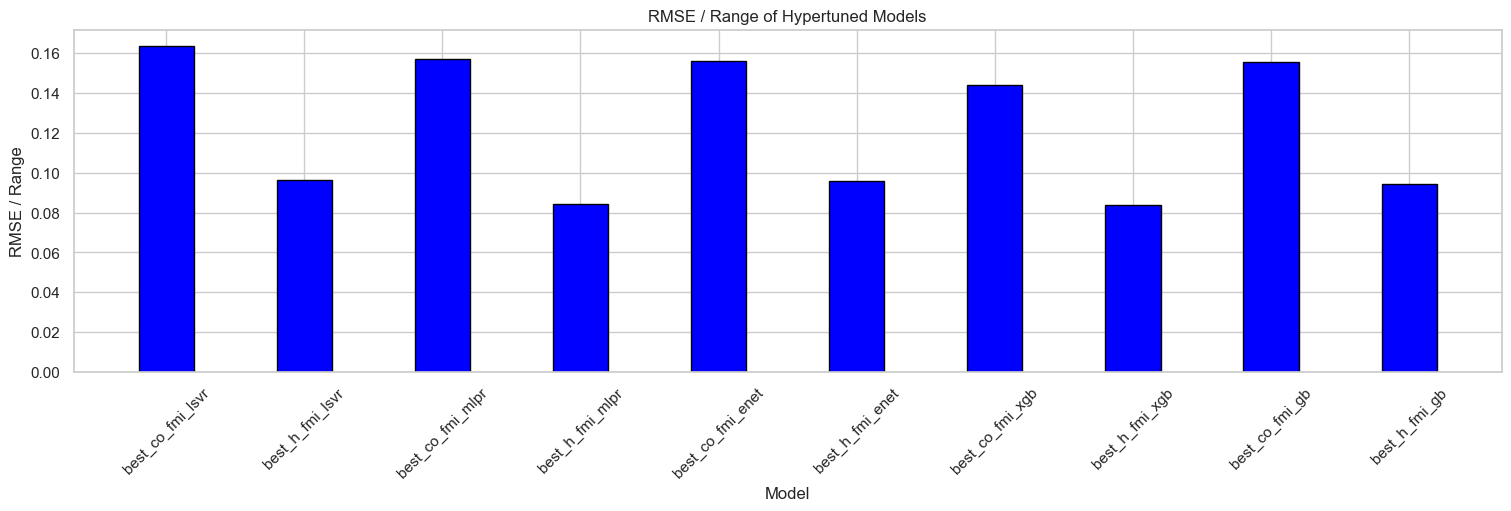

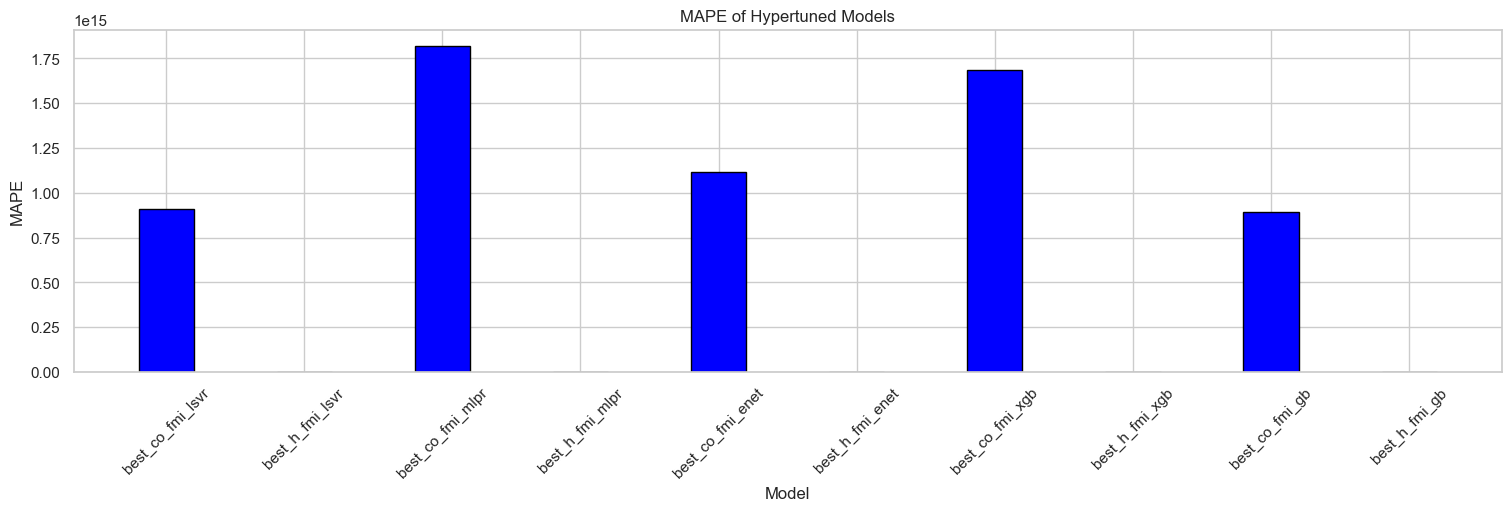

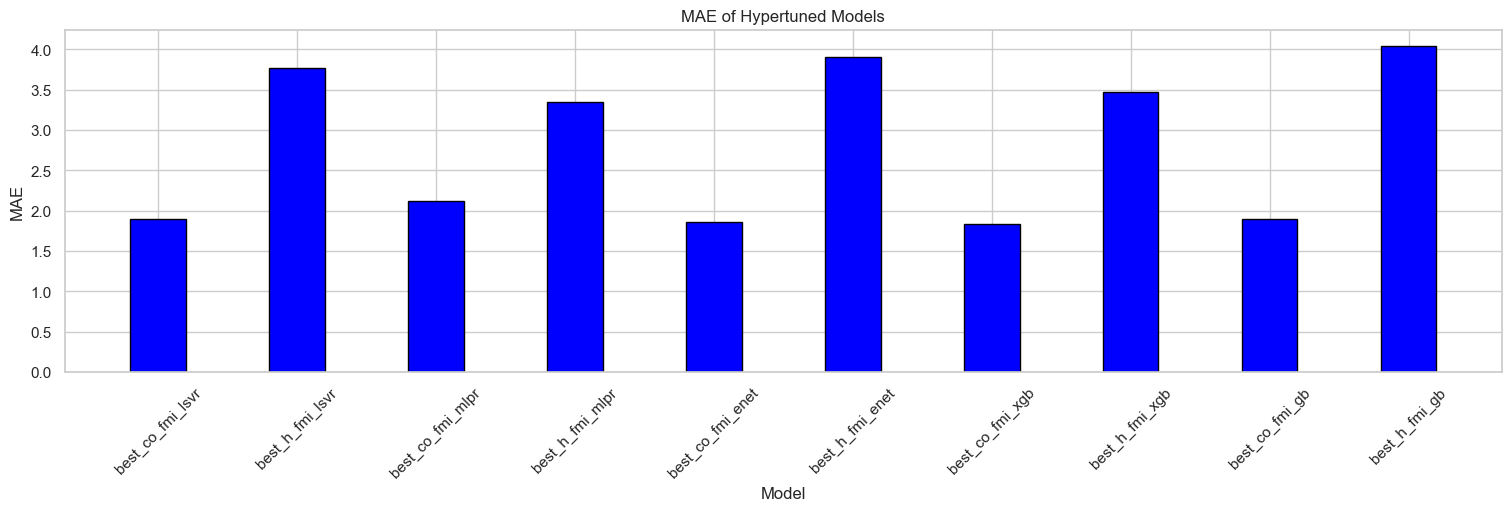

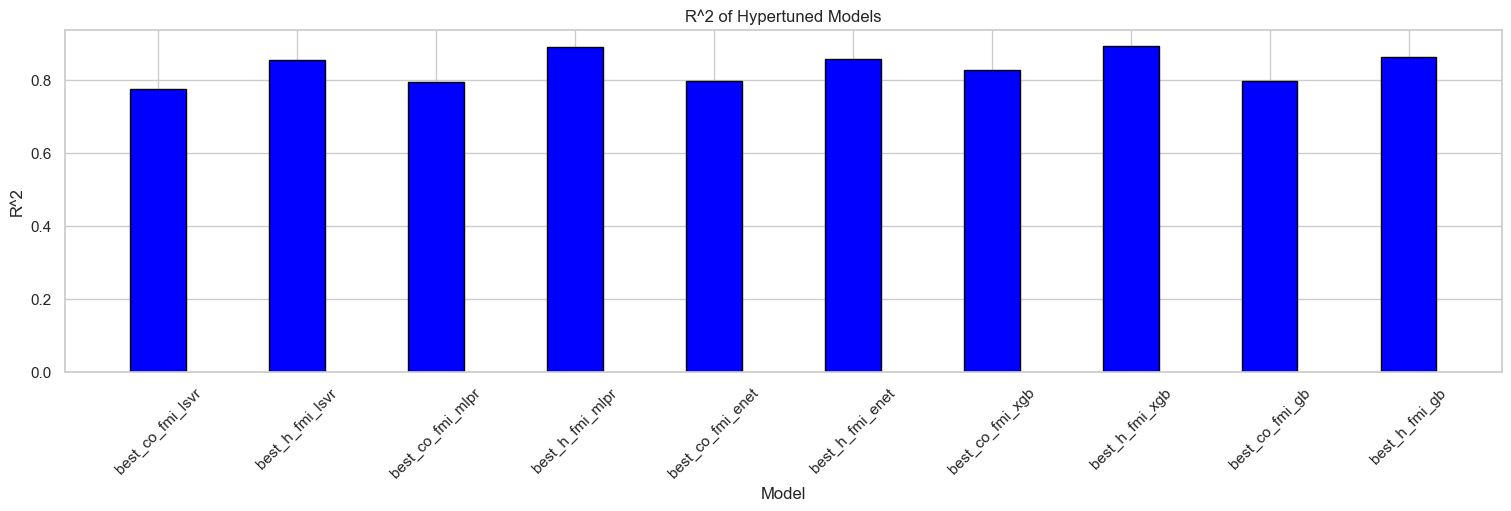

In [57]:
# Get Plots of the model data
best_model_labels = model_collections.keys()
rmses = [model_collections[label][3][0] for label in best_model_labels]

rmses_div_mean = [model_collections[label][3][1] for label in best_model_labels]
rmses_div_range = [model_collections[label][3][2] for label in best_model_labels]
mapes = [model_collections[label][3][3] for label in best_model_labels]
maes = [model_collections[label][3][4] for label in best_model_labels]
r2s = [model_collections[label][3][5] for label in best_model_labels]

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(best_model_labels, rmses, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(best_model_labels, rotation = 45)
ax1.set_ylabel("RMSE")
ax1.set_xlabel("Model")
ax1.set_title("RMSE of Hypertuned Models")

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(best_model_labels, rmses_div_mean, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(best_model_labels, rotation = 45)
ax1.set_ylabel("RMSE / Mean")
ax1.set_xlabel("Model")
ax1.set_title("RMSE / Mean of Hypertuned Models")

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(best_model_labels, rmses_div_range, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(best_model_labels, rotation = 45)
ax1.set_ylabel("RMSE / Range")
ax1.set_xlabel("Model")
ax1.set_title("RMSE / Range of Hypertuned Models")

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(best_model_labels, mapes, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(best_model_labels, rotation = 45)
ax1.set_ylabel("MAPE")
ax1.set_xlabel("Model")
ax1.set_title("MAPE of Hypertuned Models")

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(best_model_labels, maes, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(best_model_labels, rotation = 45)
ax1.set_ylabel("MAE")
ax1.set_xlabel("Model")
ax1.set_title("MAE of Hypertuned Models")

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(best_model_labels, r2s, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(best_model_labels, rotation = 45)
ax1.set_ylabel("R^2")
ax1.set_xlabel("Model")
ax1.set_title("R^2 of Hypertuned Models")

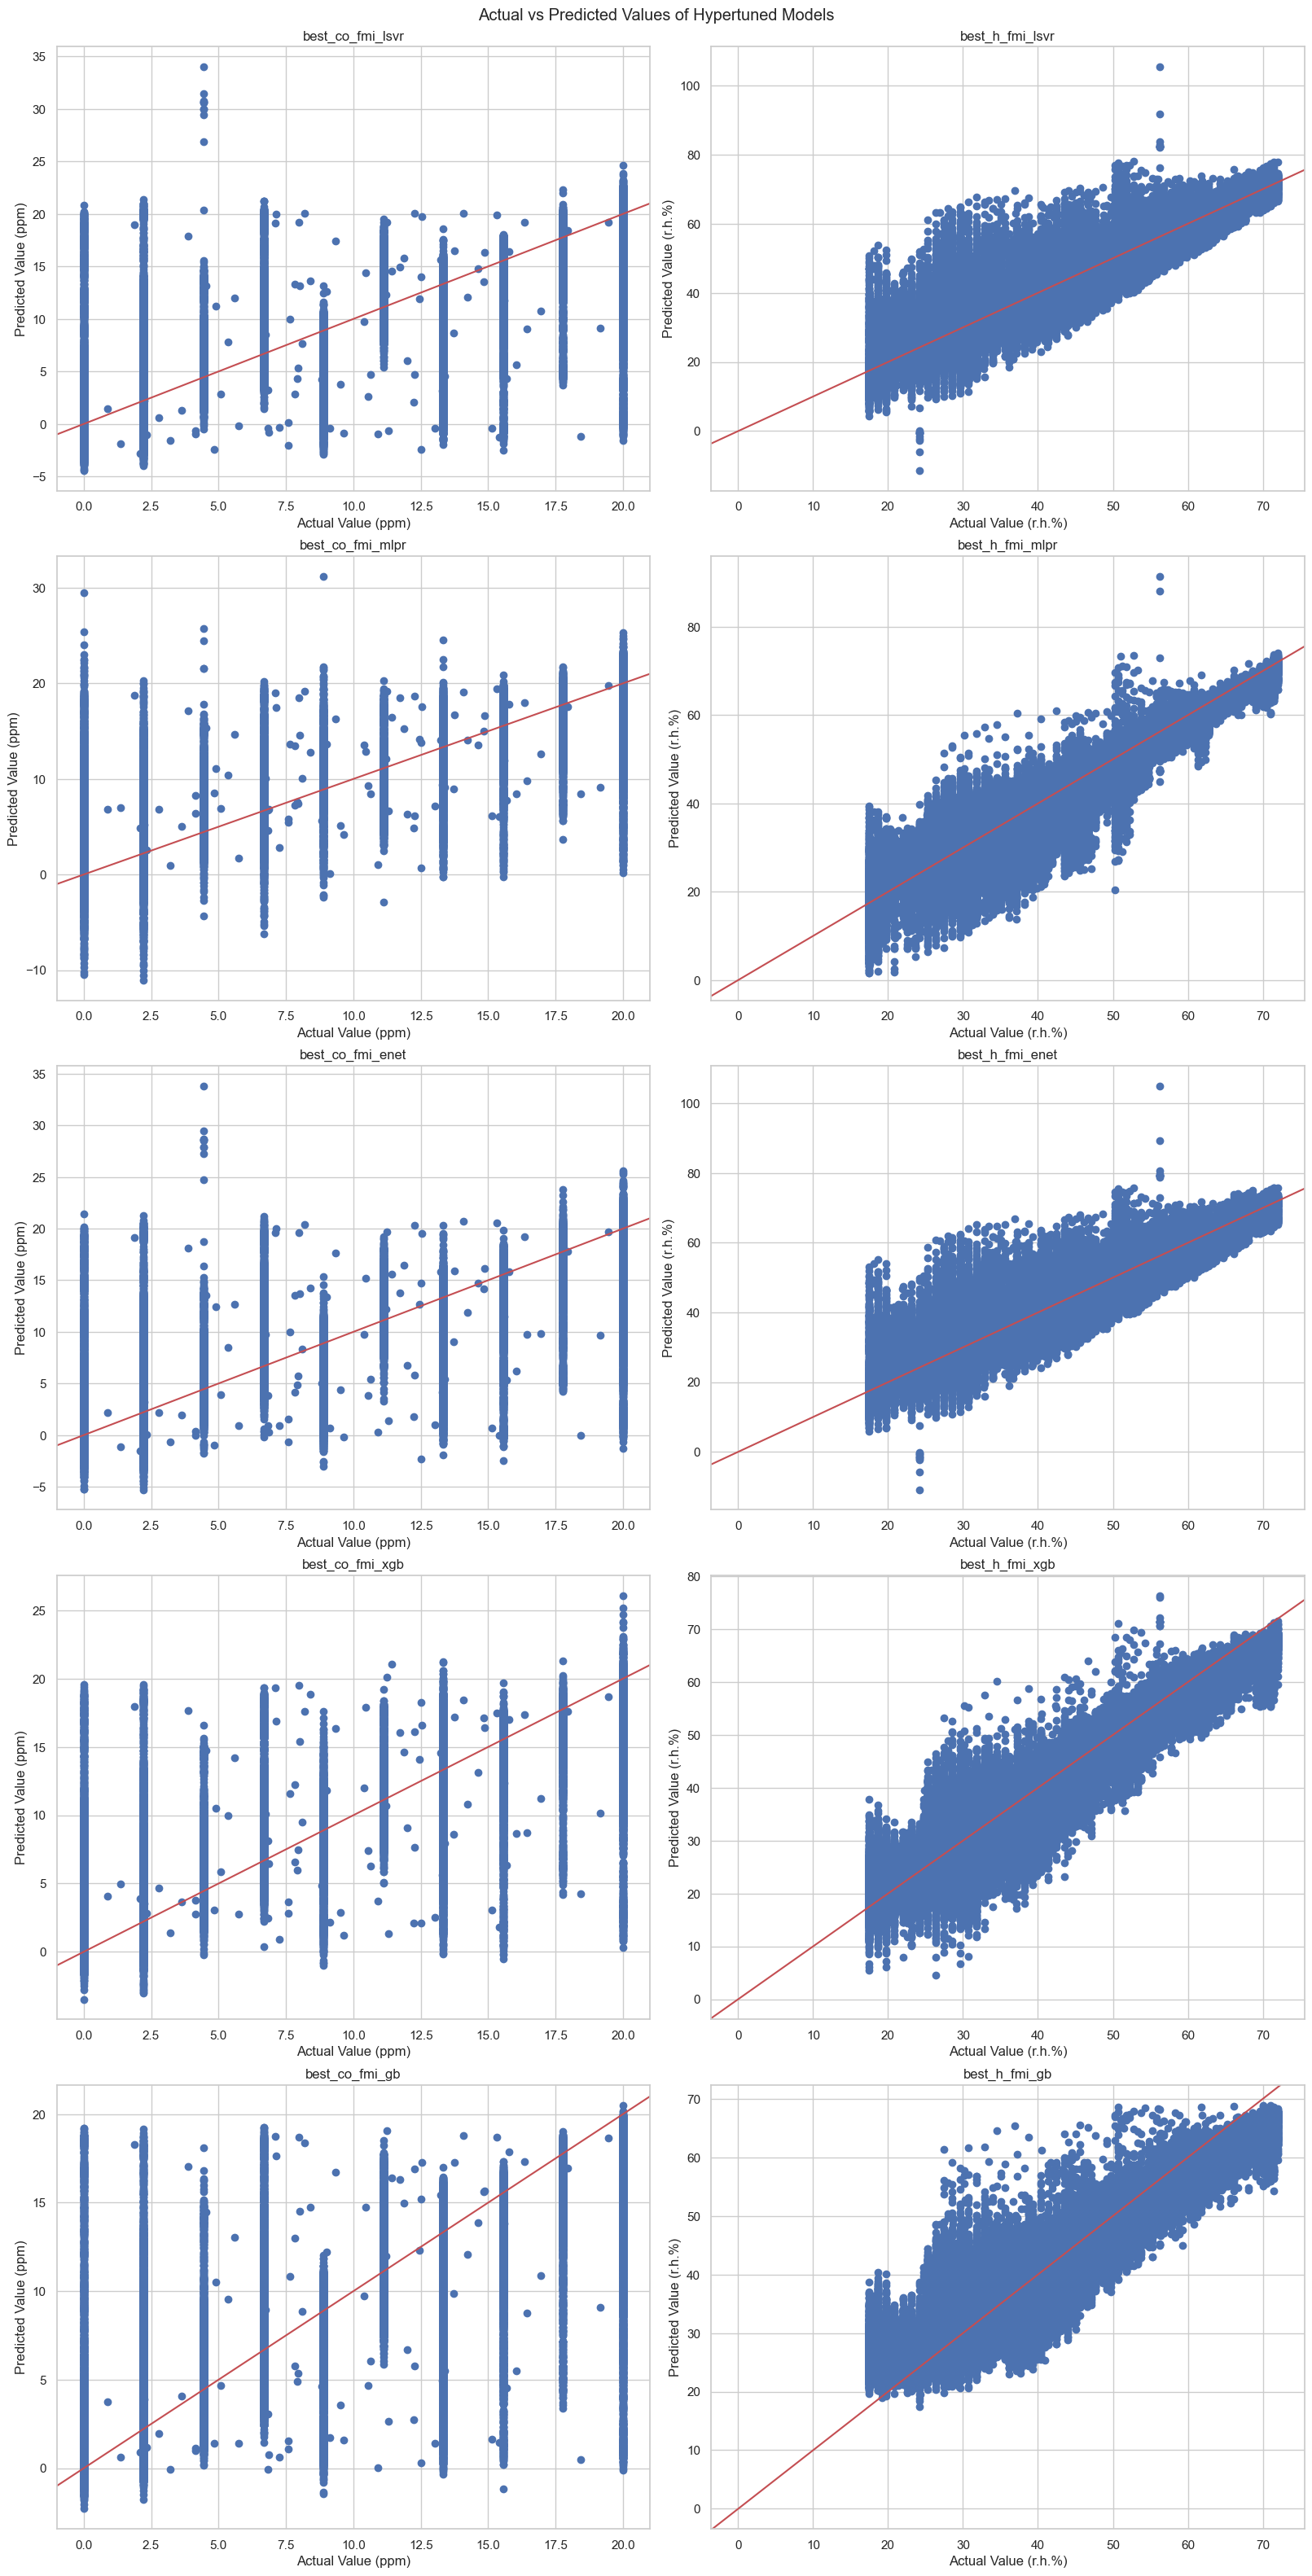

In [58]:
# Make plots of actual vs predicted values
fig = plt.figure(figsize=(16, 15 * len(model_collections.keys()) // 4), layout = "constrained")
fig.suptitle("Actual vs Predicted Values of Hypertuned Models")
for i in range(len(model_collections)):
  curr_best_model_label = list(best_model_labels)[i]
  curr_best_model = model_collections[curr_best_model_label]

  ax1 = fig.add_subplot(len(model_collections)//2 + 1, 2, i + 1)
  if i % 2 == 0:
    ax1.set_ylabel("Predicted Value (ppm)")
    ax1.set_xlabel("Actual Value (ppm)")
  else: 
    ax1.set_ylabel("Predicted Value (r.h.%)")
    ax1.set_xlabel("Actual Value (r.h.%)")
  ax1.title.set_text(curr_best_model_label)
  # Plot the predicted y values vs the actual y values
  ax1.scatter(curr_best_model[1], curr_best_model[2])
  # Plot the line y = x
  ax1.axline((0, 0), slope=1, color = "r")
  # Make sure that the axes are the same
  # ax1.set_aspect('equal', adjustable='box')
plt.show()

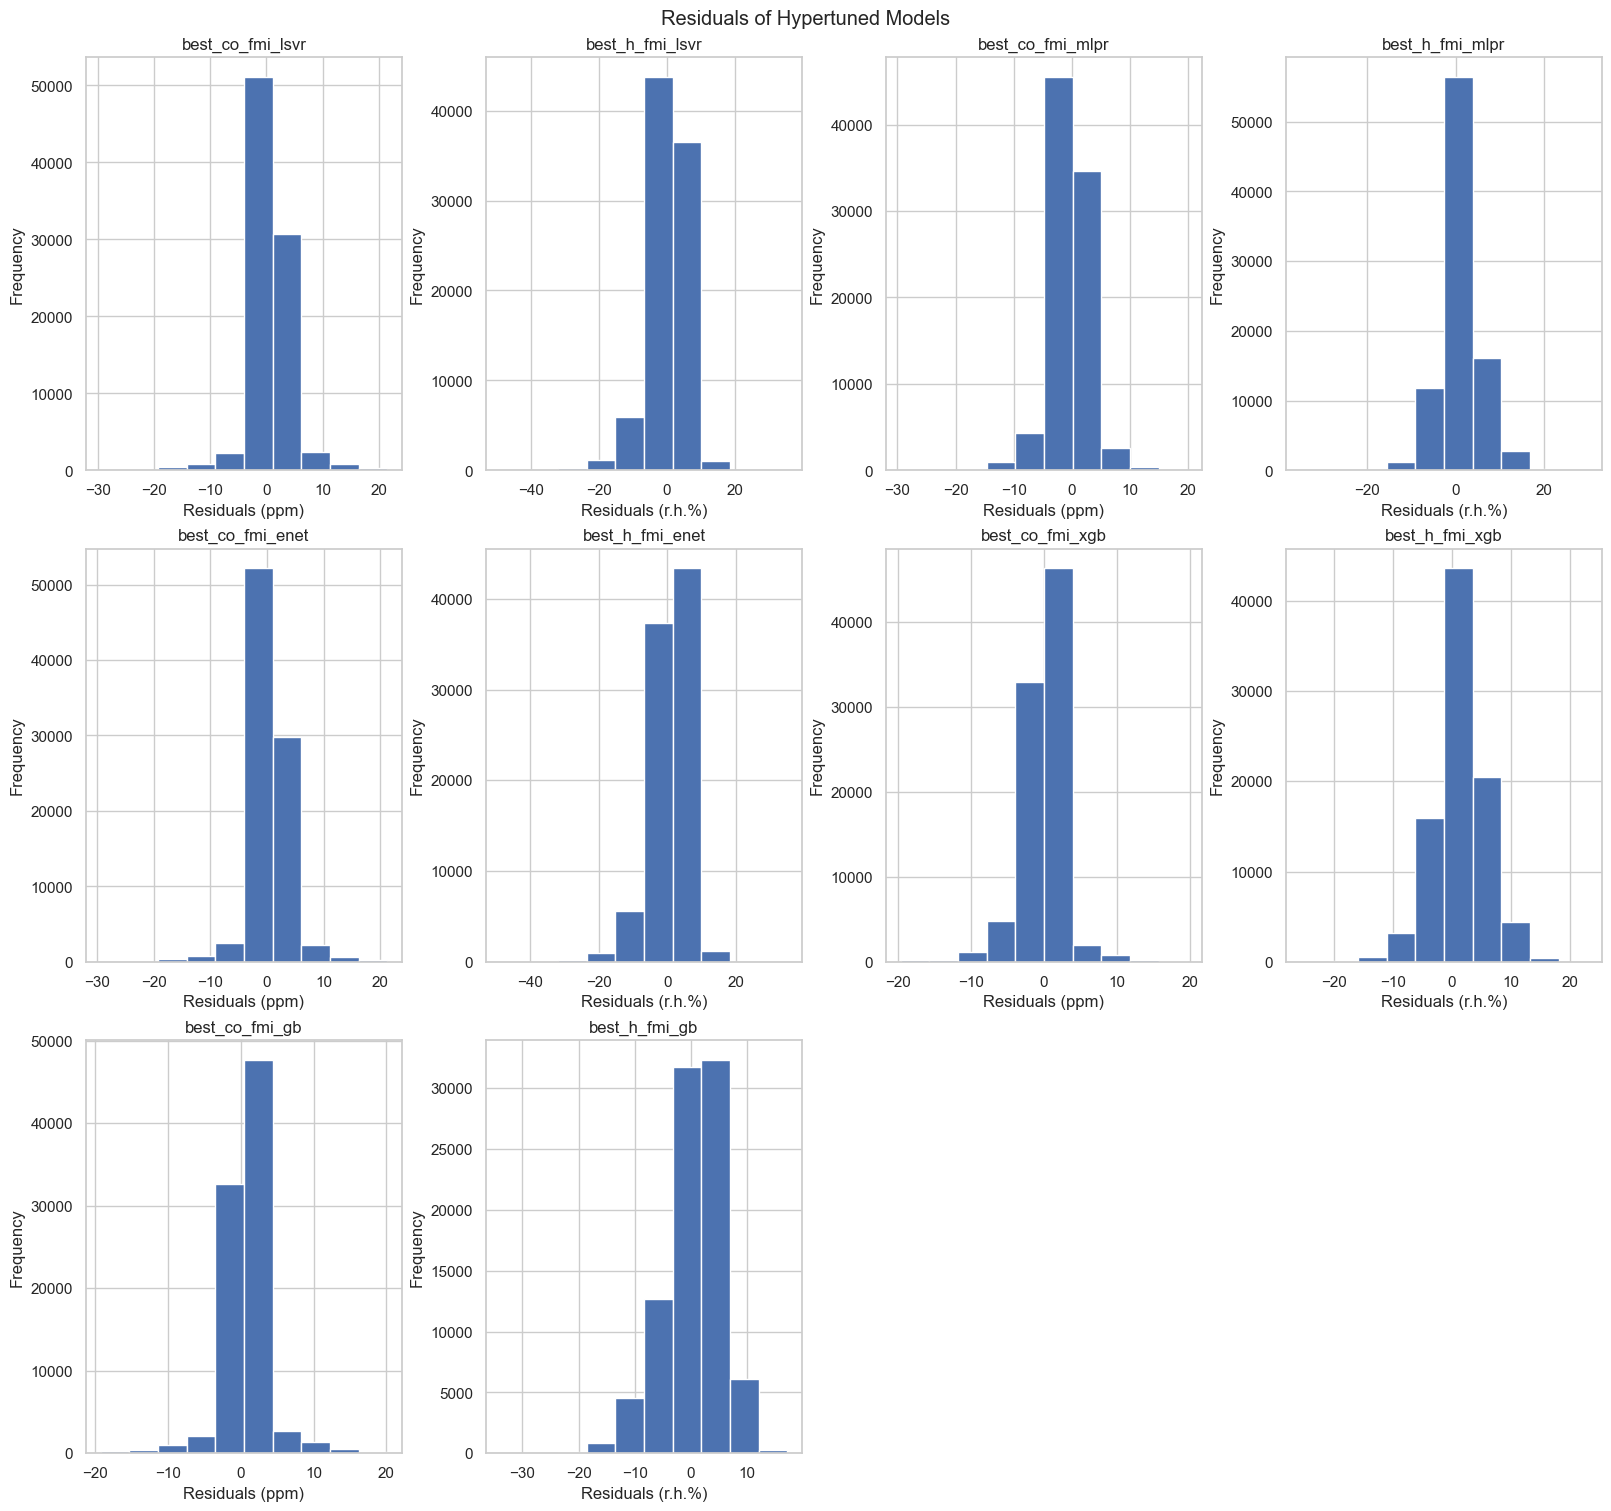

In [59]:
# Make plots of residuals values
fig = plt.figure(figsize=(16, 15), layout = "constrained")
fig.suptitle("Residuals of Hypertuned Models")
for i in range(len(model_collections)):
  curr_best_model_label = list(best_model_labels)[i]
  curr_best_model = model_collections[curr_best_model_label]
  ax1 = fig.add_subplot(len(model_collections)//4 + 1, 4, i + 1)
  if i % 2  == 0:
    ax1.set_xlabel("Residuals (ppm)")
  else:
    ax1.set_xlabel("Residuals (r.h.%)")
  ax1.set_ylabel("Frequency")
  ax1.title.set_text(curr_best_model_label)
  # Plot the predicted y values vs the actual y values
  # print(residuals[i].shape, residuals[i])
  ax1.hist(curr_best_model[1] - curr_best_model[2])
  # Make sure that the axes are the same
  # ax1.set_aspect('equal', adjustable='box')
plt.show()

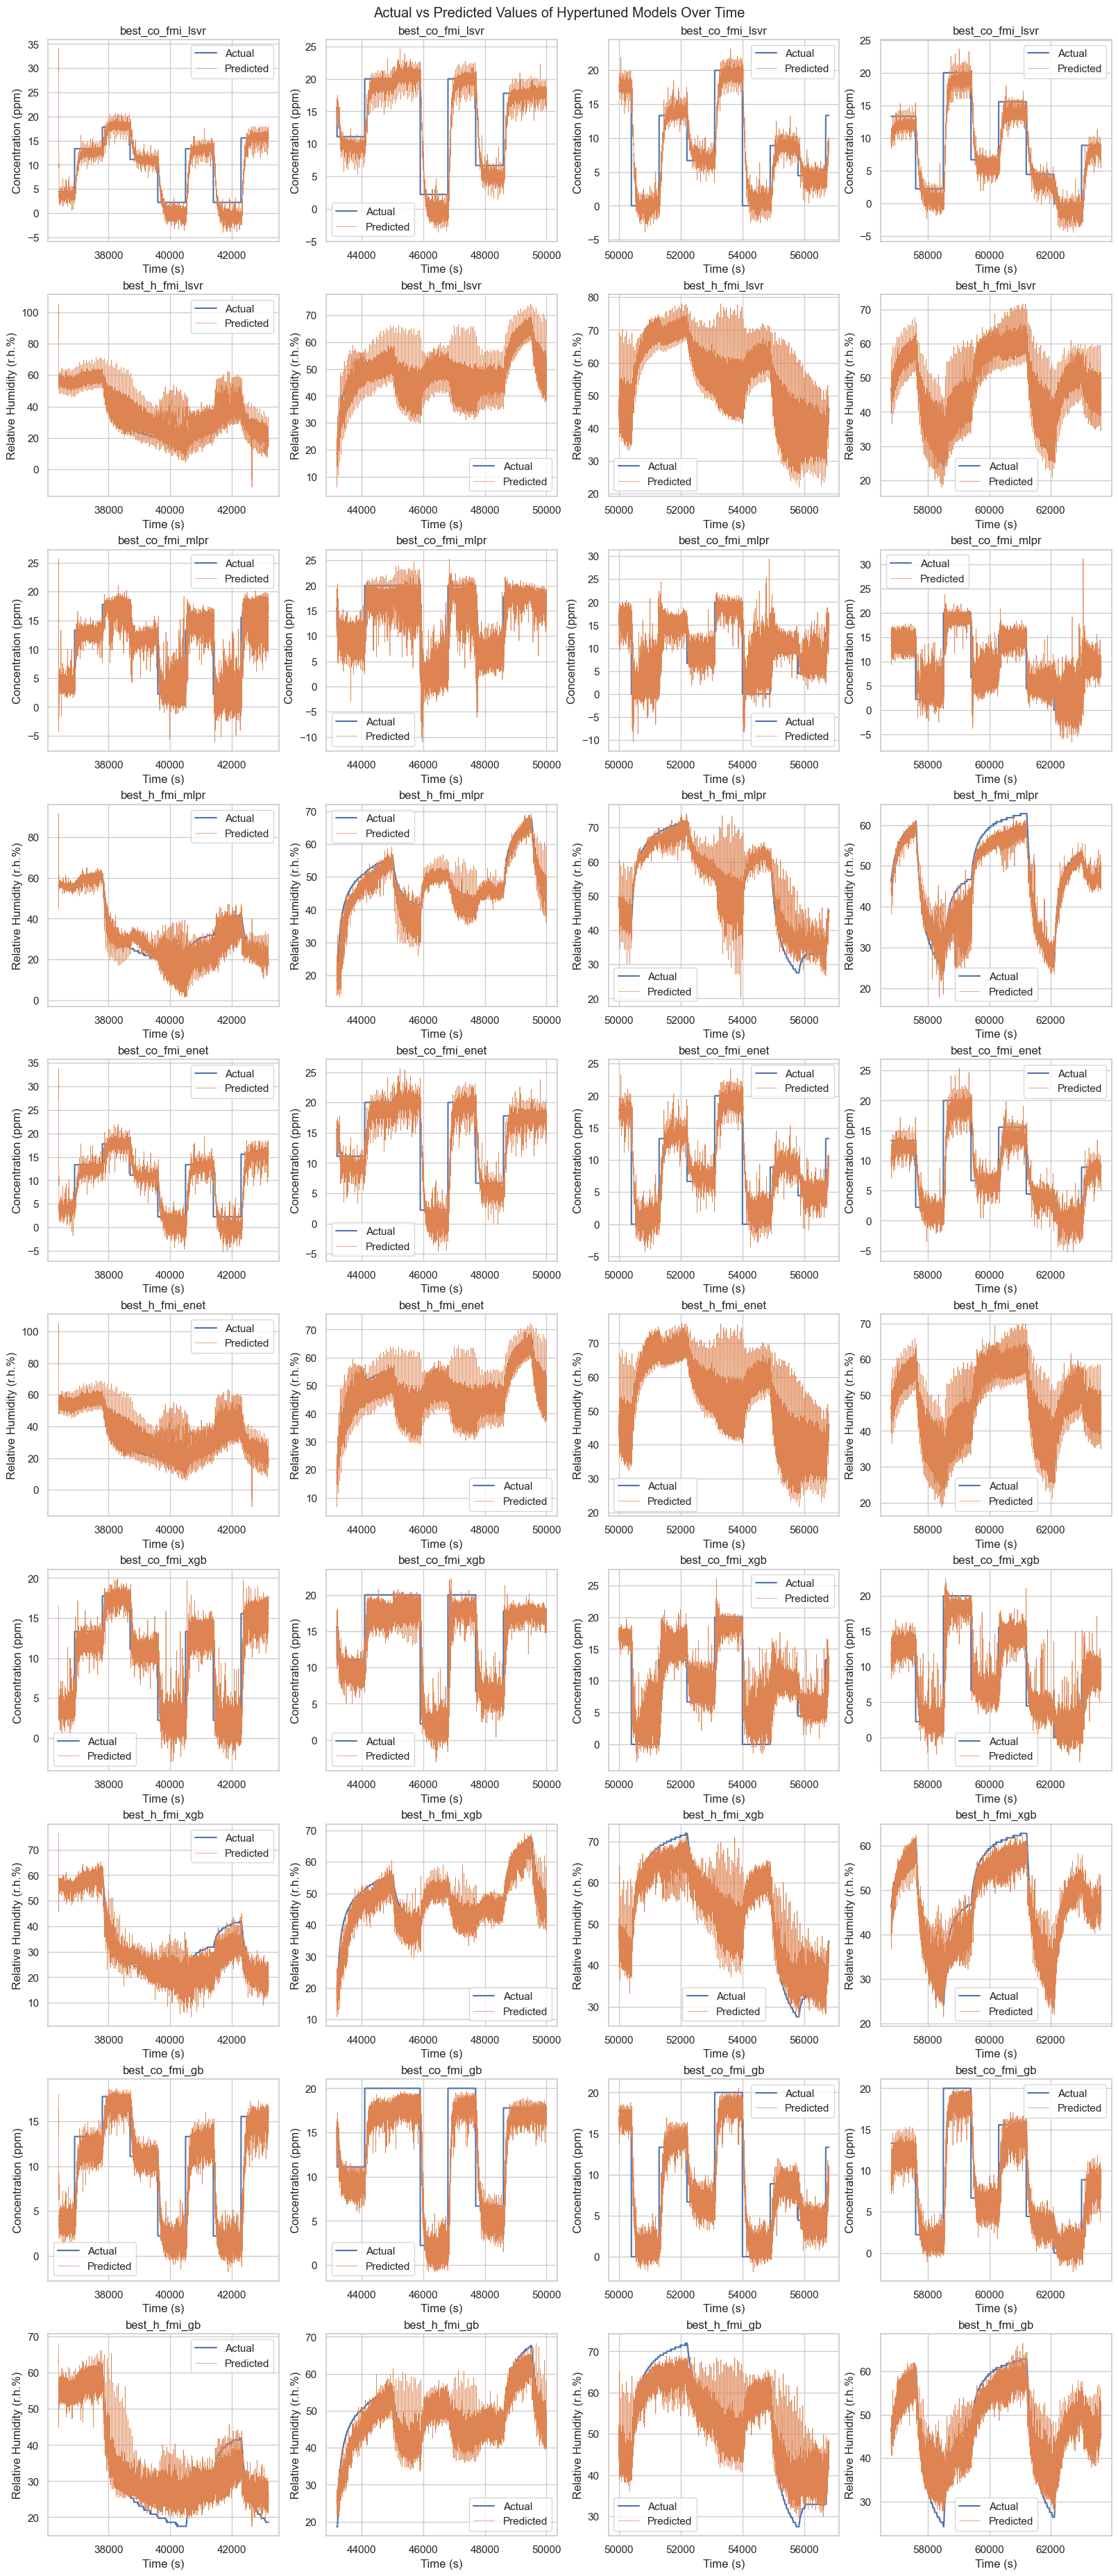

In [60]:
# Make plots of actual vs predicted values over time
fig = plt.figure(figsize=(16, 15 * len(model_collections.keys()) // 4), layout = "constrained")
fig.suptitle("Actual vs Predicted Values of Hypertuned Models Over Time")
num_ranges = 4
for i in range(len(model_collections)):
  curr_best_model_label = list(best_model_labels)[i]
  curr_best_model = model_collections[curr_best_model_label]


  for j in range(num_ranges):
    # Plot the ith range
    # Plot the predicted y values vs the actual y values
    ax1 = fig.add_subplot(len(model_collections), num_ranges, i * num_ranges + j + 1)
    if i % 2 == 0:
      ax1.set_ylabel("Concentration (ppm)")
    else: 
      ax1.set_ylabel("Relative Humidity (r.h.%)")
    ax1.set_xlabel("Time (s)")
    ax1.title.set_text(curr_best_model_label)
    data_len = len(x1_test['Time (s)'])
    ax1.plot(x1_test['Time (s)'][j * data_len // 4: (j + 1) * data_len // 4], curr_best_model[1][j * data_len // 4: (j + 1) * data_len // 4], label = "Actual")
    ax1.plot(x1_test['Time (s)'][j * data_len // 4: (j + 1) * data_len // 4], curr_best_model[2][j * data_len // 4: (j + 1) * data_len // 4], label = "Predicted", linewidth = 0.5)
    ax1.legend()
  # Plot the line y = x
  # Make sure that the axes are the same
  # ax1.set_aspect('equal', adjustable='box')
plt.show()